In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


In [3]:
plt.style.use( "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)



In [4]:
list_of_sheetnames = ["Wave " + str(i) for i in range(1, 5)]
list_of_dataframes = [
    pd.read_excel(
        Path("/Users/muhammadsafwan/Documents/ECON0002/doing-economics-datafile-working-in-excel-project-8.xlsx"),
        sheet_name=x,
    )
    for x in list_of_sheetnames
]
lifesat_data = pd.concat(list_of_dataframes, axis=0)
lifesat_data.head()

,S002EVS,S003,S006,A009,A170,C036,C037,C038,C039,C041,X001,X003,X007,X011_01,X025A,X028,X047D
0,1981-1984,Belgium,1001,Fair,9,.a,.a,.a,.a,.a,Male,53,Single/Never married,.a,.a,Full time,.a
1,1981-1984,Belgium,1002,Very good,9,.a,.a,.a,.a,.a,Male,30,Married,.a,.a,Full time,.a
2,1981-1984,Belgium,1003,Poor,3,.a,.a,.a,.a,.a,Male,61,Separated,.a,.a,Unemployed,.a
3,1981-1984,Belgium,1004,Very good,9,.a,.a,.a,.a,.a,Female,60,Married,.a,.a,Housewife,.a
4,1981-1984,Belgium,1005,Very good,9,.a,.a,.a,.a,.a,Female,60,Married,.a,.a,Housewife,.a


In [5]:
lifesat_data["A009"]


0             Fair
1        Very good
2             Poor
3        Very good
4        Very good
           ...    
66276         Good
66277         Poor
66278         Good
66279         Fair
66280         Good
Name: A009, Length: 164997, dtype: object

In [6]:
labels = [
    "EVS-wave",
    "Country/region",
    "Respondent number",
    "Health",
    "Life satisfaction",
    "Work Q1",
    "Work Q2",
    "Work Q3",
    "Work Q4",
    "Work Q5",
    "Sex",
    "Age",
    "Marital status",
    "Number of children",
    "Education",
    "Employment",
    "Monthly household income",
]

short_descriptions = [
    "EVS-wave",
    "Country/region",
    "Original respondent number",
    "State of health (subjective)",
    "Satisfaction with your life",
    "To develop talents you need to have a job",
    "Humiliating to receive money w/o working for it",
    "People who don't work become lazy",
    "Work is a duty towards society",
    "Work comes first even if it means less spare time",
    "Sex",
    "Age",
    "Marital status",
    "How many living children do you have",
    "Educational level (ISCED-code one digit)",
    "Employment status",
    "Monthly household income (x 1,000s PPP euros)",
]

labels_dict = dict(zip(lifesat_data.columns, labels))
descrp_dict = dict(zip(lifesat_data.columns, short_descriptions))

In [7]:
print(labels_dict["A170"])
print(descrp_dict["A170"])

Life satisfaction
Satisfaction with your life


In [8]:
lifesat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164997 entries, 0 to 66280
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   S002EVS  164997 non-null  object
 1   S003     164997 non-null  object
 2   S006     164997 non-null  int64 
 3   A009     164997 non-null  object
 4   A170     164997 non-null  object
 5   C036     164997 non-null  object
 6   C037     164997 non-null  object
 7   C038     164997 non-null  object
 8   C039     164997 non-null  object
 9   C041     164997 non-null  object
 10  X001     164997 non-null  object
 11  X003     164997 non-null  object
 12  X007     164997 non-null  object
 13  X011_01  164997 non-null  object
 14  X025A    164997 non-null  object
 15  X028     164997 non-null  object
 16  X047D    164997 non-null  object
dtypes: int64(1), object(16)
memory usage: 22.7+ MB


In [9]:
lifesat_data = lifesat_data.replace(".a", pd.NA)
lifesat_data.head()

,S002EVS,S003,S006,A009,A170,C036,C037,C038,C039,C041,X001,X003,X007,X011_01,X025A,X028,X047D
0,1981-1984,Belgium,1001,Fair,9,<NA>,<NA>,<NA>,<NA>,<NA>,Male,53,Single/Never married,<NA>,<NA>,Full time,<NA>
1,1981-1984,Belgium,1002,Very good,9,<NA>,<NA>,<NA>,<NA>,<NA>,Male,30,Married,<NA>,<NA>,Full time,<NA>
2,1981-1984,Belgium,1003,Poor,3,<NA>,<NA>,<NA>,<NA>,<NA>,Male,61,Separated,<NA>,<NA>,Unemployed,<NA>
3,1981-1984,Belgium,1004,Very good,9,<NA>,<NA>,<NA>,<NA>,<NA>,Female,60,Married,<NA>,<NA>,Housewife,<NA>
4,1981-1984,Belgium,1005,Very good,9,<NA>,<NA>,<NA>,<NA>,<NA>,Female,60,Married,<NA>,<NA>,Housewife,<NA>


In [10]:
col_satisfaction = "A170"
lifesat_data[col_satisfaction] = (
    lifesat_data[col_satisfaction]
    .replace({"Satisfied": 10, "Dissatisfied": 1})
    .astype("Int32")
)
lifesat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164997 entries, 0 to 66280
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   S002EVS  164997 non-null  object
 1   S003     164997 non-null  object
 2   S006     164997 non-null  int64 
 3   A009     122904 non-null  object
 4   A170     163597 non-null  Int32 
 5   C036     103827 non-null  object
 6   C037     103360 non-null  object
 7   C038     103882 non-null  object
 8   C039     103411 non-null  object
 9   C041     103844 non-null  object
 10  X001     164899 non-null  object
 11  X003     164393 non-null  object
 12  X007     164035 non-null  object
 13  X011_01  65673 non-null   object
 14  X025A    65666 non-null   object
 15  X028     163352 non-null  object
 16  X047D    81461 non-null   object
dtypes: Int32(1), int64(1), object(15)
memory usage: 22.2+ MB


In [11]:
col_num_children = "X011_01"

lifesat_data[col_num_children] = (
    lifesat_data[col_num_children].replace({"No children": 0}).astype("Int32")
)

In [12]:
col_codes = ["C036", "C037", "C038", "C039", "C041"]

lifesat_data[col_codes] = (
    lifesat_data[col_codes]
    .replace(
        {
            "Strongly disagree": 1,
            "Disagree": 2,
            "Neither agree nor disagree": 3,
            "Agree": 4,
            "Strongly agree": 5,
        }
    )
    .astype("Int32")
)

# A009 (health_code) needs a different mapping 

health_code = "A009"
lifesat_data[health_code] = (
    lifesat_data[health_code]
    .replace({"Very poor": 1, "Poor": 2, "Fair": 3, "Good": 4, "Very good": 5})
    .astype("Int32")
)


In [13]:
education_code = "X025A"
lifesat_data[education_code].str.split(" : ", expand=True)

,0,1
0,<NA>,None
1,<NA>,None
2,<NA>,None
3,<NA>,None
4,<NA>,None
...,...,...
66276,3,(Upper) secondary education
66277,3,(Upper) secondary education
66278,3,(Upper) secondary education
66279,3,(Upper) secondary education


In [14]:
ed_num, ed_sch = [education_code + suffix for suffix in ["_num", "_sch"]]

print(ed_num)
print(ed_sch)

X025A_num
X025A_sch


In [15]:
lifesat_data[[ed_num, ed_sch]] = lifesat_data[education_code].str.split(
    " : ", expand=True
)
lifesat_data[ed_num] = pd.to_numeric(lifesat_data[ed_num]).astype("Int32")
lifesat_data.sample(5, random_state=2)

,S002EVS,S003,S006,A009,A170,C036,C037,C038,C039,C041,X001,X003,X007,X011_01,X025A,X028,X047D,X025A_num,X025A_sch
5726,1999-2001,Croatia,451,<NA>,8,2,2,2,2,2,Male,65,Married,<NA>,<NA>,Unemployed,0.328085,<NA>,None
37647,2008-2010,Moldova,555,2,2,3,4,4,4,4,Female,43,Married,3,3 : (Upper) secondary education,Retired,0.051055,3,(Upper) secondary education
59639,2008-2010,Ukraine,28,3,5,4,5,5,5,2,Female,43,Married,2,5 : First stage of tertiary education,Full time,0.416618,5,First stage of tertiary education
15459,1990-1993,Germany,1806,4,7,<NA>,<NA>,<NA>,<NA>,<NA>,Male,21,Single/Never married,<NA>,<NA>,Students,<NA>,<NA>,None
564,1981-1984,Belgium,1575,3,8,<NA>,<NA>,<NA>,<NA>,<NA>,Female,47,Married,<NA>,<NA>,Housewife,<NA>,<NA>,None


In [16]:
lifesat_data["X047D"] = pd.to_numeric(lifesat_data["X047D"])
lifesat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164997 entries, 0 to 66280
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   S002EVS    164997 non-null  object 
 1   S003       164997 non-null  object 
 2   S006       164997 non-null  int64  
 3   A009       122904 non-null  Int32  
 4   A170       163597 non-null  Int32  
 5   C036       103827 non-null  Int32  
 6   C037       103360 non-null  Int32  
 7   C038       103882 non-null  Int32  
 8   C039       103411 non-null  Int32  
 9   C041       103844 non-null  Int32  
 10  X001       164899 non-null  object 
 11  X003       164393 non-null  object 
 12  X007       164035 non-null  object 
 13  X011_01    65673 non-null   Int32  
 14  X025A      65666 non-null   object 
 15  X028       163352 non-null  object 
 16  X047D      81461 non-null   float64
 17  X025A_num  65666 non-null   Int32  
 18  X025A_sch  65666 non-null   object 
dtypes: Int32(9), float64(1), int6

In [17]:
include = ["X003", "A170", "X028", "X007", "X001"]
lifesat_data = lifesat_data.reset_index(drop=True)
lifesat_data = lifesat_data.loc[lifesat_data[include].dropna().index, :]

In [18]:
# A009 is not in Wave 3.
# Note that even though it's just one entry, we use square brackets to make it a list
include_in_wave_1_2_4 = ["A009"]
# Work attitudes and income are in Waves 3 and 4.
include_in_wave_3_4 = ["C036", "C037", "C038", "C039", "C041", "X047D"]
# Number of children and education are in Wave 4.
include_in_wave_4 = ["X011_01", "X025A"]

In [19]:
# In Wave 1 (1981-1984) or Wave 2 (1990-1993), or they are in Waves 3 or 4 with complete information
condition_wave_3_4 = (lifesat_data[include_in_wave_3_4].notna()).all(axis=1) | (
    lifesat_data["S002EVS"].isin(["1981-1984", "1990-1993"])
)
lifesat_data = lifesat_data.loc[condition_wave_3_4, :]

# In Wave 4 with complete information on the questions specific to that wave or not in Wave 4
condition_wave_4 = (
    lifesat_data[include_in_wave_4].notna().all(axis=1)
) | ~lifesat_data["S002EVS"].isin(["2008-2010"])
lifesat_data = lifesat_data.loc[condition_wave_4, :]

# In Waves 1, 2, or 4 with complete information on the questions specific to those waves, or in Wave 3
condition_wave_1_2_4 = (lifesat_data[include_in_wave_1_2_4].notna().all(axis=1)) | (
    lifesat_data["S002EVS"].isin(["1999-2001"])
)
lifesat_data = lifesat_data.loc[condition_wave_1_2_4, :]

In [20]:

lifesat_data["work_ethic"] = lifesat_data.loc[
    :, ["C036", "C037", "C038", "C039", "C041"]
].apply(pd.to_numeric, errors='coerce').mean(axis=1)


In [21]:
from statsmodels.distributions.empirical_distribution import ECDF

# Create empty col for new variable
lifesat_data["inc_percentile"] = np.nan

# Fill it for waves 3 and 4 with relevant data
condition_inc_percentile = (
    lifesat_data["S002EVS"].isin(["1999-2001", "2008-2010"])
) & (lifesat_data["X047D"].notna())

lifesat_data.loc[condition_inc_percentile, "inc_percentile"] = (
    lifesat_data.loc[
        condition_inc_percentile, :
    ]  # Select waves 3 & 4 without missing income data
    .groupby("S002EVS")["X047D"]  # Groupby wave  # Select income variable
    .transform(
        lambda x: np.round(ECDF(x)(x) * 100, 1)
    )  # Compute ecdf as %, round to 1 decimal place
)

# See 5 random rows of the dataframe with the new column
lifesat_data.sample(5, random_state=5)

,S002EVS,S003,S006,A009,A170,C036,C037,C038,C039,C041,...,X003,X007,X011_01,X025A,X028,X047D,X025A_num,X025A_sch,work_ethic,inc_percentile
131098,2008-2010,Latvia,2021,3,5,4,3,4,4,1,...,49,Separated,1,4 : Post-secondary non-tertiary education,Full time,0.236323,4,Post-secondary non-tertiary education,3.2,12.9
117867,2008-2010,Finland,1202,4,8,4,4,4,4,2,...,21,Single/Never married,0,3 : (Upper) secondary education,Full time,0.513750,3,(Upper) secondary education,3.6,33.3
132906,2008-2010,Luxembourg,545,5,8,5,5,3,4,5,...,20,Single/Never married,0,1 : Primary education or first stage of basic...,Unemployed,1.570500,1,Primary education or first stage of basic edu...,4.4,73.9
60183,1999-2001,Belgium,3496,<NA>,8,3,3,4,3,2,...,27,Married,<NA>,<NA>,Full time,2.276878,<NA>,None,3.0,79.2
164386,2008-2010,Kosovo,1001,5,4,5,5,5,5,5,...,34,Separated,2,5 : First stage of tertiary education,Full time,1.214100,5,First stage of tertiary education,5.0,63.5


In [22]:
sum_table = (
    lifesat_data.loc[
        lifesat_data["S002EVS"] == "2008-2010", :
    ]  # Wave 4 only, all columns
    .groupby(["X028", "S003"])[  # Group by employment and country
        "X028"
    ]  # Select employment column
    .count()  # Count number of observations in each category (employment-country)
    .unstack()  # Turn countries from an index into columns (countries because they are the last groupby variable)
    .transform(lambda x: x * 100 / x.sum())  # Compute a percentage
    .round(2)  # Round to 2 decimal places
    .T  # Transpose so countries are the index, employment types the columns
)

sum_table

X028,Full time,Housewife,Other,Part time,Retired,Self employed,Students,Unemployed
S003,,,,,,,,
Albania,29.42,7.42,1.50,5.50,9.08,22.08,7.33,17.67
Armenia,23.86,20.92,1.14,8.09,18.38,5.96,6.70,14.95
Austria,39.80,7.24,1.89,9.95,25.49,5.02,8.39,2.22
Belarus,57.88,2.43,1.21,6.95,18.59,3.40,6.87,2.67
Belgium,42.89,5.96,3.72,8.94,23.01,3.57,5.21,6.70
Bosnia Herzegovina,34.06,9.33,0.82,2.90,14.67,3.08,8.15,26.99
Bulgaria,46.32,2.62,0.76,2.79,31.28,5.58,2.37,8.28
Croatia,41.58,3.37,0.93,2.78,26.01,2.86,8.75,13.72
Cyprus,46.32,13.68,1.29,2.84,24.39,6.58,1.68,3.23


In [23]:
(
    lifesat_data.loc[
        lifesat_data["S002EVS"] == "2008-2010", :
    ]  # Wave 4 only, all columns
    .groupby(["X001"])[  # Group by gender
        ["A009", "A170", "work_ethic", "X003", "X025A_num", "X011_01"]
    ]  # Select columns
    .mean(numeric_only=True)
    .round(2)  # Round to 2 decimal places
)

,A009,A170,work_ethic,X025A_num,X011_01
X001,,,,,
Female,3.6,6.93,3.64,3.05,1.69
Male,3.77,7.03,3.72,3.14,1.55


In [24]:
(
    lifesat_data.loc[
        lifesat_data["S002EVS"] == "2008-2010", :
    ]  # Wave 4 only, all columns
    .groupby(["X001"])[  # Group by gender
        ["A009", "A170", "work_ethic", "X003", "X025A_num", "X011_01"]
    ]  # Select columns
    .std()
    .round(2)  # Round to 2 decimal places
)

,A009,A170,work_ethic,X003,X025A_num,X011_01
X001,,,,,,
Female,0.97,2.32,0.76,17.47,1.4,1.39
Male,0.93,2.28,0.76,17.36,1.31,1.43


In [25]:
(
    lifesat_data.loc[
        lifesat_data["S002EVS"] == "2008-2010", :
    ]  # Wave 4 only, all columns
    .groupby(["X001"])[  # Group by gender
        ["A009", "A170", "work_ethic", "X003", "X025A_num", "X011_01"]
    ]  # Select columns
    .agg(["mean", "std"])
    .round(2)  # Round to 2 decimal places
)

A009        A170       work_ethic             X003        X025A_num  \
        mean   std  mean   std       mean   std       mean    std      mean   
X001                                                                          
Female   3.6  0.97  6.93  2.32       3.64  0.76  47.275556  17.47      3.05   
Male    3.77  0.93  7.03  2.28       3.72  0.76  46.873437  17.36      3.14   

             X011_01        
         std    mean   std  
X001                        
Female   1.4    1.69  1.39  
Male    1.31    1.55  1.43

In [26]:
tab = (
    lifesat_data.loc[
        lifesat_data["S002EVS"] == "2008-2010", :
    ]  # Wave 4 only, all columns
    .groupby(["X001"])[  # Group by gender
        ["A009", "A170", "work_ethic", "X003", "X025A_num", "X011_01"]
    ]  # Select columns
    .agg(["mean", "std"])
    .round(2)  # Round to 2 decimal places
    .stack()  # bring mean and std into the index
    .rename(labels_dict, axis=1)  # rename the columns
)

tab

/var/folders/3w/_cdy_3s5287614bhjk5d9kvw0000gn/T/ipykernel_32285/3411316813.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack()  # bring mean and std into the index


Health  Life satisfaction  work_ethic        Age  X025A_num  \
X001                                                                       
Female mean     3.6               6.93        3.64  47.275556       3.05   
       std     0.97               2.32        0.76      17.47        1.4   
Male   mean    3.77               7.03        3.72  46.873437       3.14   
       std     0.93               2.28        0.76      17.36       1.31   

             Number of children  
X001                             
Female mean                1.69  
       std                 1.39  
Male   mean                1.55  
       std                 1.43

In [27]:
labels_dict.update({"X025A_num": "Education Level"})
tab = tab.rename(labels_dict, axis=1)
tab.index.names = [
    "",
    "",
]  # Set index names empty (two levels because two column levels)

tab

Health  Life satisfaction  work_ethic        Age  \
                                                                
Female mean     3.6               6.93        3.64  47.275556   
       std     0.97               2.32        0.76      17.47   
Male   mean    3.77               7.03        3.72  46.873437   
       std     0.93               2.28        0.76      17.36   

             Education Level  Number of children  
                                                  
Female mean             3.05                1.69  
       std               1.4                1.39  
Male   mean             3.14                1.55  
       std              1.31                1.43

In [28]:
waves = ["1999-2001", "2008-2010"]
country = "Germany"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)

In [29]:
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

,S002EVS,work_ethic,count,percentage
0,1999-2001,1.2,3,0.209497
1,1999-2001,1.4,6,0.418994
2,1999-2001,1.6,9,0.628492
3,1999-2001,1.8,15,1.047486
4,1999-2001,2.0,18,1.256983


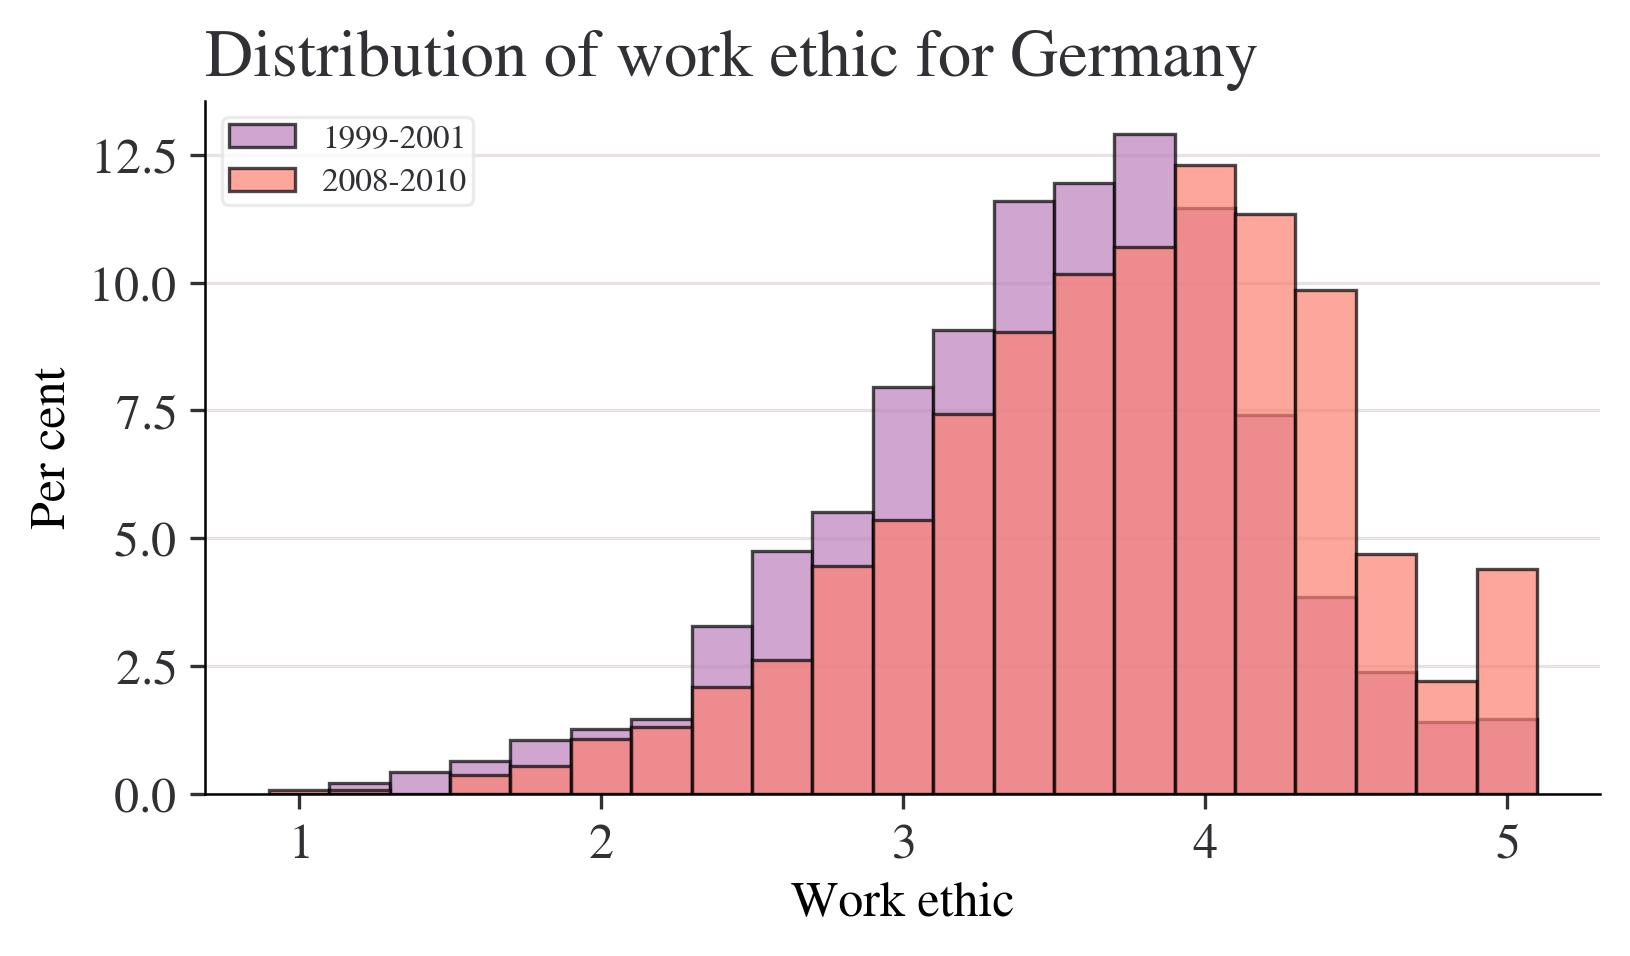

In [30]:
fig, ax = plt.subplots()
for wave in waves:
    sub_df = ethic_pct.loc[
        ethic_pct["S002EVS"] == wave, :
    ]  # For convenience, subset the dataframe
    ax.bar(sub_df["work_ethic"], sub_df["percentage"], width=0.2, alpha=0.7, label=wave)
ax.legend()
ax.set_xlabel("Work ethic")
ax.set_ylabel("Per cent")
ax.set_title(f"Distribution of work ethic for {country}", loc="left")
plt.show()

In [31]:
avg_life_sat = (
    lifesat_data.groupby(["S002EVS", "S003"])["A170"]  # Groupby wave and country
    .mean()  # Take the mean of life satisfaction
    .unstack()
    .T.dropna(  # One row per country, one wave per column
        how="any", axis="index"
    )  # Drop any rows with missing observations
)
avg_life_sat

S002EVS,1981-1984,1990-1993,1999-2001,2008-2010
S003,,,,
Belgium,7.373659,7.600515,7.417261,7.628444
Denmark,8.208083,8.168627,8.312646,8.408106
France,6.707666,6.770642,6.983779,7.053691
Germany,7.219167,7.028605,7.431564,6.773619
Iceland,8.046307,8.010145,8.076202,8.072072
Ireland,7.815372,7.87663,8.20844,7.823413
Italy,6.651618,7.298985,7.182841,7.398402
Netherlands,7.750459,7.769076,7.827736,7.9904
Northern Ireland,7.659164,7.884868,8.0672,7.81877


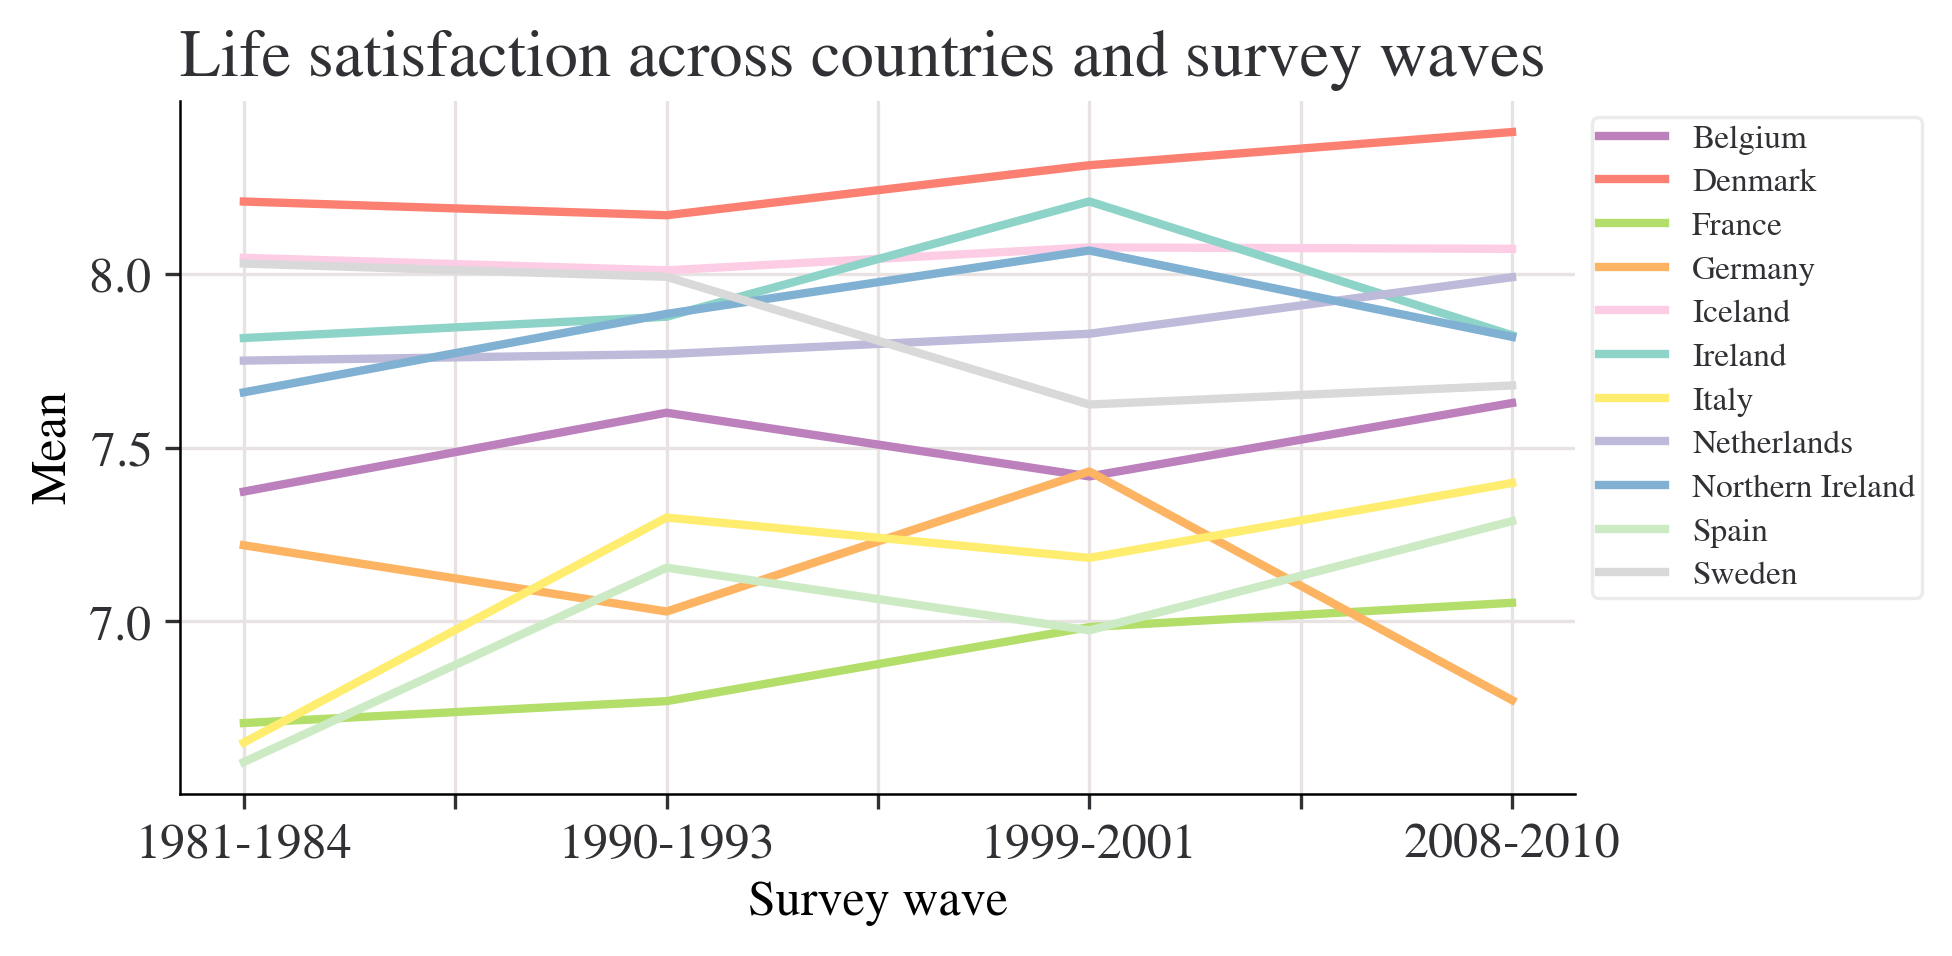

In [32]:
fig, ax = plt.subplots()
avg_life_sat.T.plot(ax=ax)
ax.set_title("Life satisfaction across countries and survey waves", loc="left")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel("Survey wave")
ax.set_ylabel("Mean")
plt.show()

In [33]:
# First convert the column to float, but handle NA values properly
lifesat_data["X003"] = pd.to_numeric(lifesat_data["X003"], errors='coerce')  # This will convert NA values to NaN

# Note that the columns employment and gender don't exist yet; we'll create them in the next line of code
cols_to_select = [
    "X003",
    "X025A_num",
    "employment",
    "gender",
    "A009",
    "X047D",
    "X011_01",
    "inc_percentile",
    "A170",
    "work_ethic",
]

corr_matrix = (
    lifesat_data.loc[lifesat_data["S002EVS"] == "2008-2010", :]
    .assign(
        gender=lambda x: np.where(x["X001"] == "Male", 0, 1),
        employment=lambda x: np.where(
            x["X028"] == "Full time", 1, np.where(x["X028"] == "Unemployed", 0, np.nan)
        ),
    )
    .loc[:, cols_to_select]
    .corr()
)

In [34]:
len_s = 1000
prng = np.random.default_rng(42)  # prng=probabilistic random number generator
s = pd.Series(
    index=pd.date_range("2000-01-01", periods=len_s, name="date", freq="D"),
    data=prng.integers(-10, 10, size=len_s),
)
s.head()

date
2000-01-01   -9
2000-01-02    5
2000-01-03    3
2000-01-04   -2
2000-01-05   -2
Freq: D, dtype: int64

In [35]:
print("\n`.agg` following `.groupby`: groups provide index")
print(s.groupby(s.index.to_period("M")).agg("skew").head())
print("\n`.transform` following `.groupby`: retain original index")
print(s.groupby(s.index.to_period("M")).transform("skew").head())
print("\n`.apply` following `.groupby`: index entries can be new")
print(s.groupby(s.index.to_period("M")).apply(lambda x: x[x > 0].cumsum()).head())



`.agg` following `.groupby`: groups provide index
date
2000-01   -0.364739
2000-02   -0.186137
2000-03    0.017442
2000-04   -0.298289
2000-05   -0.140669
Freq: M, dtype: float64

`.transform` following `.groupby`: retain original index
date
2000-01-01   -0.364739
2000-01-02   -0.364739
2000-01-03   -0.364739
2000-01-04   -0.364739
2000-01-05   -0.364739
Freq: D, dtype: float64

`.apply` following `.groupby`: index entries can be new
date     date      
2000-01  2000-01-02     5
         2000-01-03     8
         2000-01-06    15
         2000-01-08    18
         2000-01-12    27
dtype: int64


In [36]:
# Makes a dataframe rather than just a series
s = pd.DataFrame(s, columns=["number"])
# Creating data directly
s["new_column_directly"] = 10
s.head()

,number,new_column_directly
date,,
2000-01-01,-9,10
2000-01-02,5,10
2000-01-03,3,10
2000-01-04,-2,10
2000-01-05,-2,10


In [37]:
# Creating data using assign
s = s.assign(new_column_indirectly=11)
s.head()

,number,new_column_directly,new_column_indirectly
date,,,
2000-01-01,-9,10,11
2000-01-02,5,10,11
2000-01-03,3,10,11
2000-01-04,-2,10,11
2000-01-05,-2,10,11


In [38]:
corr_matrix.loc[:, ["A170", "work_ethic"]]

,A170,work_ethic
X003,-0.082205,0.133333
X025A_num,0.093639,-0.145356
employment,0.183873,-0.027108
gender,-0.021055,-0.047816
A009,0.375603,-0.073209
X047D,0.235425,-0.152270
X011_01,-0.017294,0.089255
inc_percentile,0.295930,-0.186799
A170,1.000000,-0.033525
work_ethic,-0.033525,1.000000


In [39]:
employment_list = ["Full time", "Retired", "Unemployed"]

df_employment = (
    lifesat_data.loc[
        (lifesat_data["S002EVS"] == "2008-2010")
        & (lifesat_data["X028"].isin(employment_list)),  # Row selection
        :,  # Col selection—all columns
    ]  # Select wave 4 and these specific emp types
    .groupby(["S003", "X028"])  # Group by country and employment type
    .mean(numeric_only=True)[
        "A170"
    ]  # Mean value of life satisfaction by country and employment
    .unstack()  # Reshape to one row per country (country is inner layer)
    .assign(  # Create the differences in means
        D1=lambda x: x["Full time"] - x["Unemployed"],
        D2=lambda x: x["Full time"] - x["Retired"],
    )
)

df_employment.round(2)

X028,Full time,Retired,Unemployed,D1,D2
S003,,,,,
Albania,6.63,5.81,6.07,0.57,0.83
Armenia,6.04,4.85,5.46,0.58,1.18
Austria,7.44,7.74,6.07,1.36,-0.31
Belarus,6.1,5.62,5.61,0.49,0.48
Belgium,7.72,7.83,6.37,1.35,-0.12
Bosnia Herzegovina,7.33,7.01,6.77,0.56,0.33
Bulgaria,6.18,4.97,4.69,1.48,1.2
Croatia,7.31,6.48,7.17,0.14,0.83
Cyprus,7.38,7.03,6.56,0.82,0.35


In [40]:
df_work_ethic = (
    lifesat_data.loc[
        (lifesat_data["S002EVS"] == "2008-2010"), ["S003", "work_ethic"]
    ]  # Select wave 4 and two columns only
    .groupby(["S003"])  # Group by country
    .mean()  # Mean value of work_ethic by country
)

df_work_ethic.head().round(2)

,work_ethic
S003,
Albania,3.92
Armenia,3.89
Austria,3.72
Belarus,3.62
Belgium,3.31


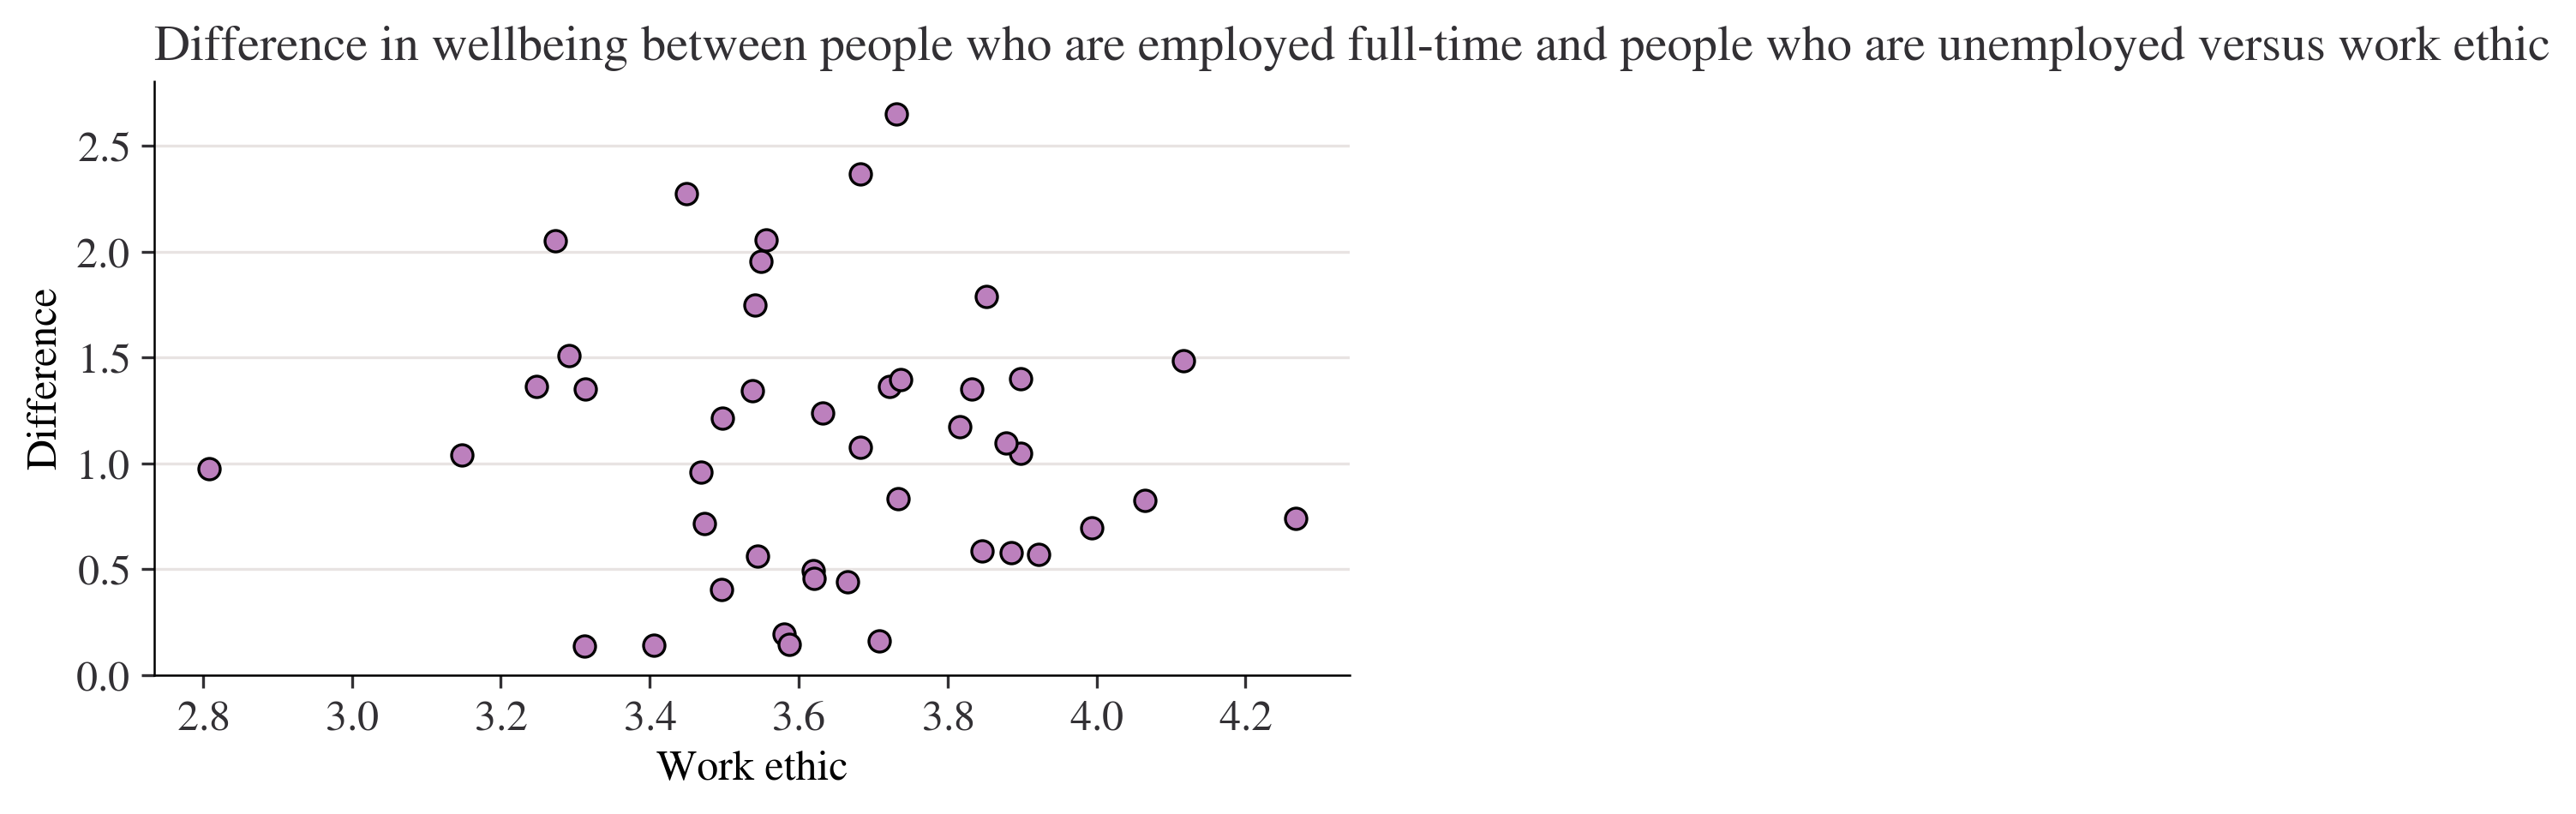

In [41]:
df_emp_ethic_comb = pd.merge(df_employment, df_work_ethic, on=["S003"], how="inner")

fig, ax = plt.subplots()
ax.scatter(df_emp_ethic_comb["work_ethic"], df_emp_ethic_comb["D1"])
ax.set_ylabel("Difference")
ax.set_xlabel("Work ethic")
ax.set_title(
    "Difference in wellbeing between people who are employed full-time and people who are unemployed versus work ethic",
    size=14,
)
ax.set_ylim(0, None)
plt.show()

In [42]:
df_emp_ethic_comb.corr().loc[["D1", "D2"], ["work_ethic"]]

,work_ethic
D1,-0.157565
D2,0.484261


In [43]:
country_list = ["Norway", "Latvia", "Italy"]

df_emp_se = (
    lifesat_data.loc[
        (lifesat_data["S002EVS"] == "2008-2010")
        & (lifesat_data["X028"].isin(employment_list))
        & (lifesat_data["S003"].isin(country_list)),
        :,
    ]  # Select the relevant employment types, countries, and wave 4
    .groupby(["S003", "X028"])  # Groupby country and employment type
    .apply(lambda x: x["A170"].std() / np.sqrt(x["A170"].count()))
    # .std(ddof=0)["A170"]  # Find the standard dev of life satisfaction
    .unstack()  # Put the employment types along the columns
    .assign(  # Calculate the standard errors of the differences
        D1_SE=lambda x: (x["Full time"].pow(2) + x["Unemployed"].pow(2)).pow(1 / 2),
        D2_SE=lambda x: (x["Full time"].pow(2) + x["Retired"].pow(2)).pow(1 / 2),
    )
)

df_emp_se.round(2)

/var/folders/3w/_cdy_3s5287614bhjk5d9kvw0000gn/T/ipykernel_32285/3721651204.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["A170"].std() / np.sqrt(x["A170"].count()))


X028,Full time,Retired,Unemployed,D1_SE,D2_SE
S003,,,,,
Italy,0.11,0.16,0.31,0.33,0.19
Latvia,0.08,0.14,0.27,0.29,0.16
Norway,0.06,0.18,0.65,0.66,0.19


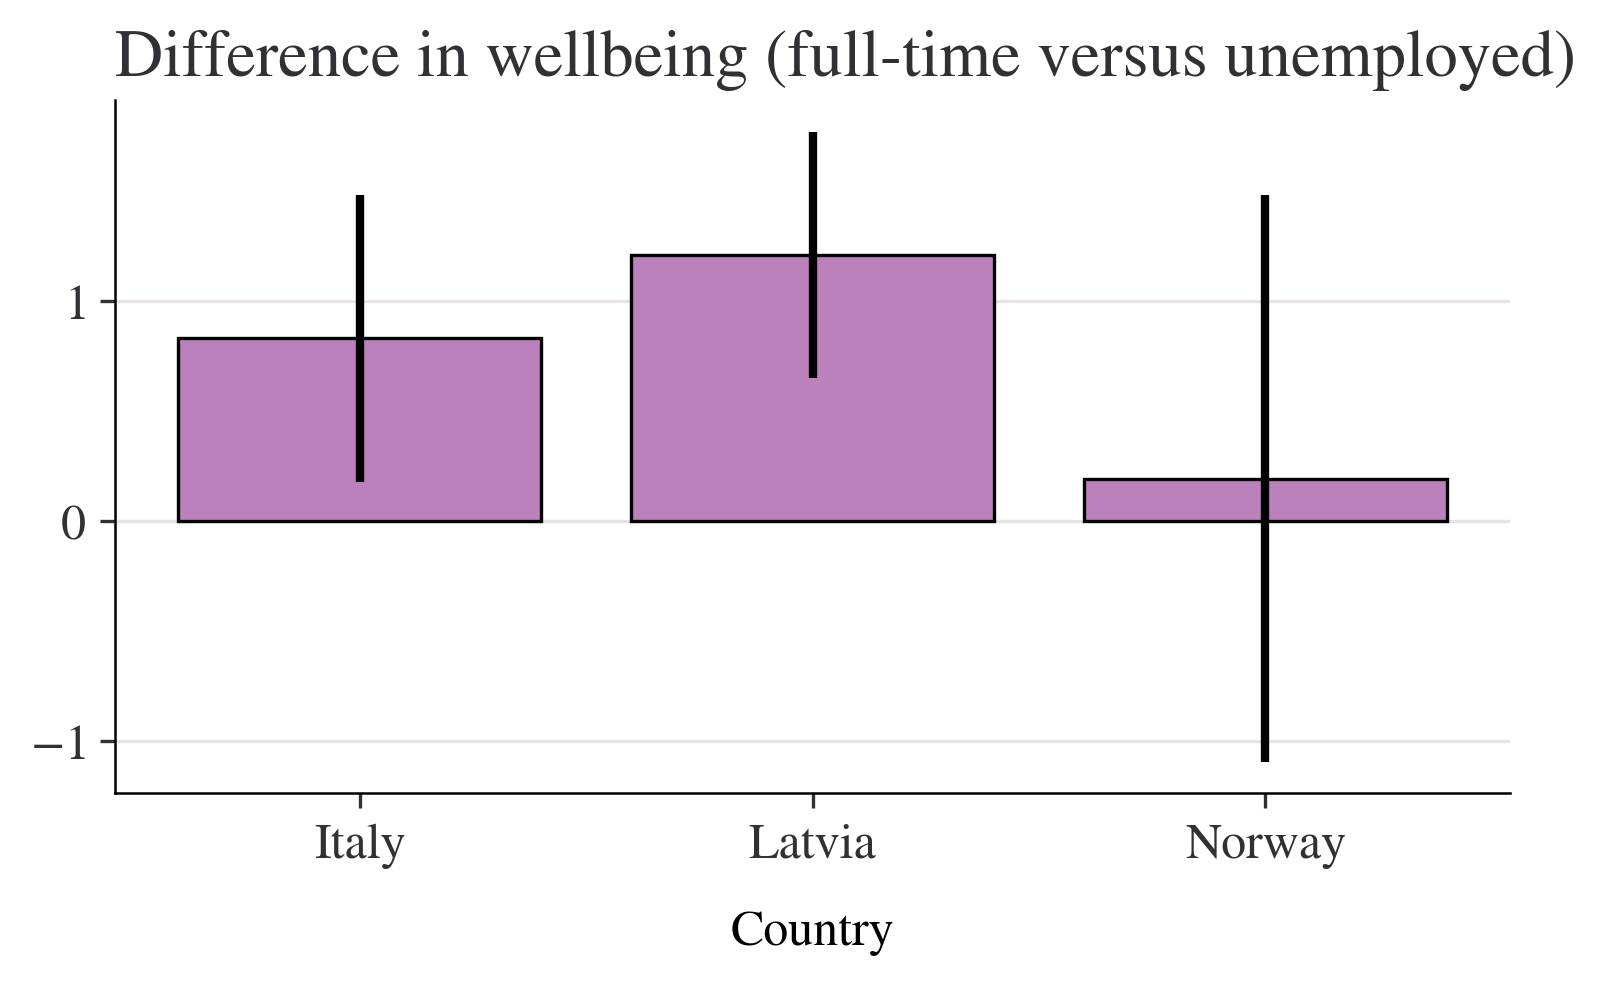

In [44]:
df_emp_subset = (
    df_employment.loc[df_employment.index.isin(country_list), ["D1", "D2"]]
    .join(df_emp_se.loc[:, ["D1_SE", "D2_SE"]], how="inner")
    .assign(CI_1=lambda x: 1.96 * x["D1_SE"], CI_2=lambda x: 1.96 * x["D2_SE"])
)

df_emp_subset.round(3)
fig, ax = plt.subplots()
ax.bar(df_emp_subset.index, df_emp_subset["D1"], yerr=df_emp_subset["CI_1"])
ax.set_xlabel("Country", labelpad=10)
ax.set_xlabel("Country")
ax.set_title("Difference in wellbeing (full-time versus unemployed)")
plt.show()

In [45]:
import pingouin as pg

In [46]:
!pip install pingouin

In [47]:
# Create a Boolean that's true for wave 4, Turkey, and full-time
full_boolean = (
    (lifesat_data["S002EVS"] == "2008-2010")
    & (lifesat_data["S003"] == "Turkey")
    & (lifesat_data["X028"] == "Full time")
)

turkey_full = (
    lifesat_data.loc[full_boolean, ["A170"]]  # Select the life satisfaction data
    .astype("double")  # Ensure this is a floating point number
    .values  # Grab the values--this is needed for the t-test
)

# Do the same for the unemployed
unem_boolean = (
    (lifesat_data["S002EVS"] == "2008-2010")
    & (lifesat_data["S003"] == "Turkey")
    & (lifesat_data["X028"] == "Unemployed")
)
turkey_unemployed = lifesat_data.loc[unem_boolean, ["A170"]].astype("double").values

In [48]:
(lifesat_data["S002EVS"] == "2008-2010") & (lifesat_data["S003"] == "Turkey") & (lifesat_data["X028"] == "Full time")

0         False
1         False
2         False
3         False
4         False
          ...  
164987    False
164992    False
164993    False
164994    False
164995    False
Length: 129515, dtype: bool

In [49]:
# Corrected code with proper parentheses around each condition
(lifesat_data["S002EVS"] == "2008-2010") & (lifesat_data["S003"] == "Turkey") & (lifesat_data["X028"] == "Full time")

# Note: The & operator in pandas requires each condition to be in parentheses
# Without parentheses, Python evaluates the expressions from left to right,
# causing the error because it tries to perform bitwise AND between a boolean array and a scalar boolean

0         False
1         False
2         False
3         False
4         False
          ...  
164987    False
164992    False
164993    False
164994    False
164995    False
Length: 129515, dtype: bool

In [50]:
turkey_full = (
    lifesat_data
    # Select wave 4, Turkey, and full time
    .query("S002EVS == '2008-2010' and S003 == 'Turkey' and X028 == 'Full time'")
    .loc[:, ["A170"]]  # Select the life satisfaction data
    .astype("double")  # Ensure this is a floating point number
    .values  # Grab the values--this is needed for the t-test
)

In [51]:
ttest = pg.ttest(turkey_full.ravel(), turkey_unemployed.ravel()).round(3)
ttest

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.218,575.096,two-sided,0.001,"[0.29, 1.19]",0.26,13.551,0.901


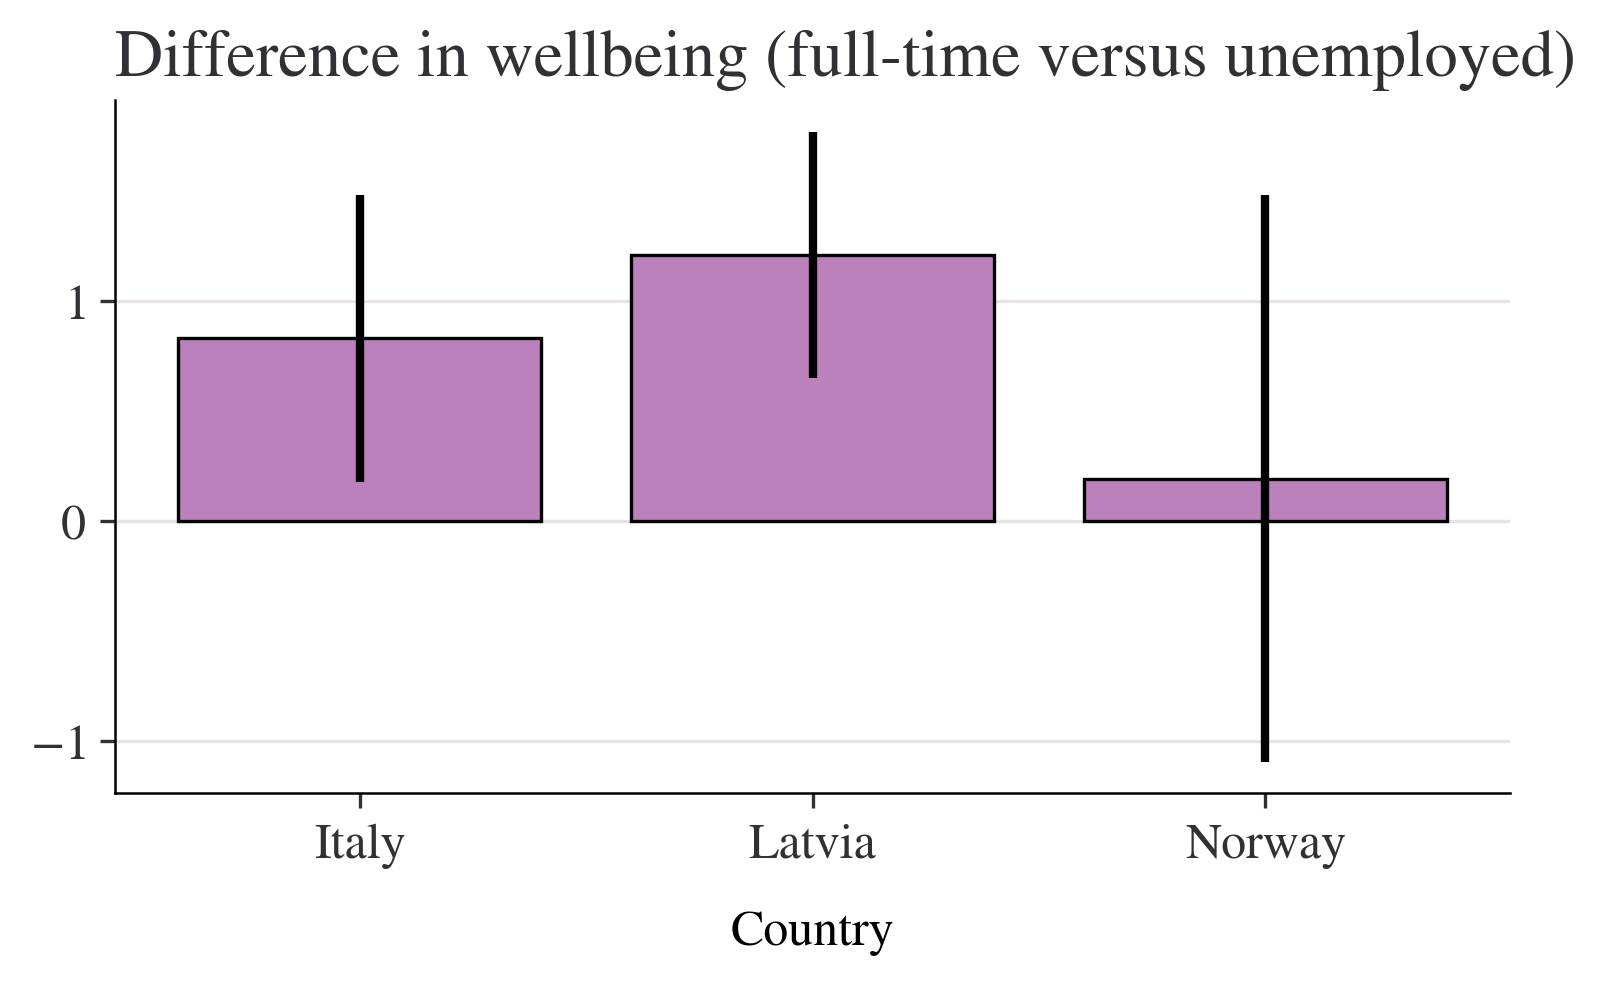

In [52]:
fig, ax = plt.subplots()
ax.bar(df_emp_subset.index, df_emp_subset["D1"], yerr=df_emp_subset["CI_1"])
ax.set_xlabel("Country", labelpad=10)
ax.set_xlabel("Country")
ax.set_title("Difference in wellbeing (full-time versus unemployed)")
plt.show()

In [53]:
waves = ["1999-2001", "2008-2010"]
country = "Germany"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

,S002EVS,work_ethic,count,percentage
0,1999-2001,1.2,3,0.209497
1,1999-2001,1.4,6,0.418994
2,1999-2001,1.6,9,0.628492
3,1999-2001,1.8,15,1.047486
4,1999-2001,2.0,18,1.256983


In [54]:
waves = ["1999-2001", "2008-2010"]
country = "Belgium"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

,S002EVS,work_ethic,count,percentage
0,1999-2001,1.0,18,1.28388
1,1999-2001,1.2,6,0.42796
2,1999-2001,1.4,11,0.784593
3,1999-2001,1.6,19,1.355207
4,1999-2001,1.8,39,2.78174


In [55]:
waves = ["1999-2001", "2008-2010"]
country = "Croatia"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

,S002EVS,work_ethic,count,percentage
0,1999-2001,1.4,1,0.117786
1,1999-2001,1.6,1,0.117786
2,1999-2001,1.8,5,0.588928
3,1999-2001,2.0,10,1.177856
4,1999-2001,2.2,18,2.120141


In [56]:
waves = ["1999-2001", "2008-2010"]
country = "Albania"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

,S002EVS,work_ethic,count,percentage
0,2008-2010,2.0,3,0.25
1,2008-2010,2.2,6,0.5
2,2008-2010,2.4,10,0.833333
3,2008-2010,2.6,17,1.416667
4,2008-2010,2.8,25,2.083333


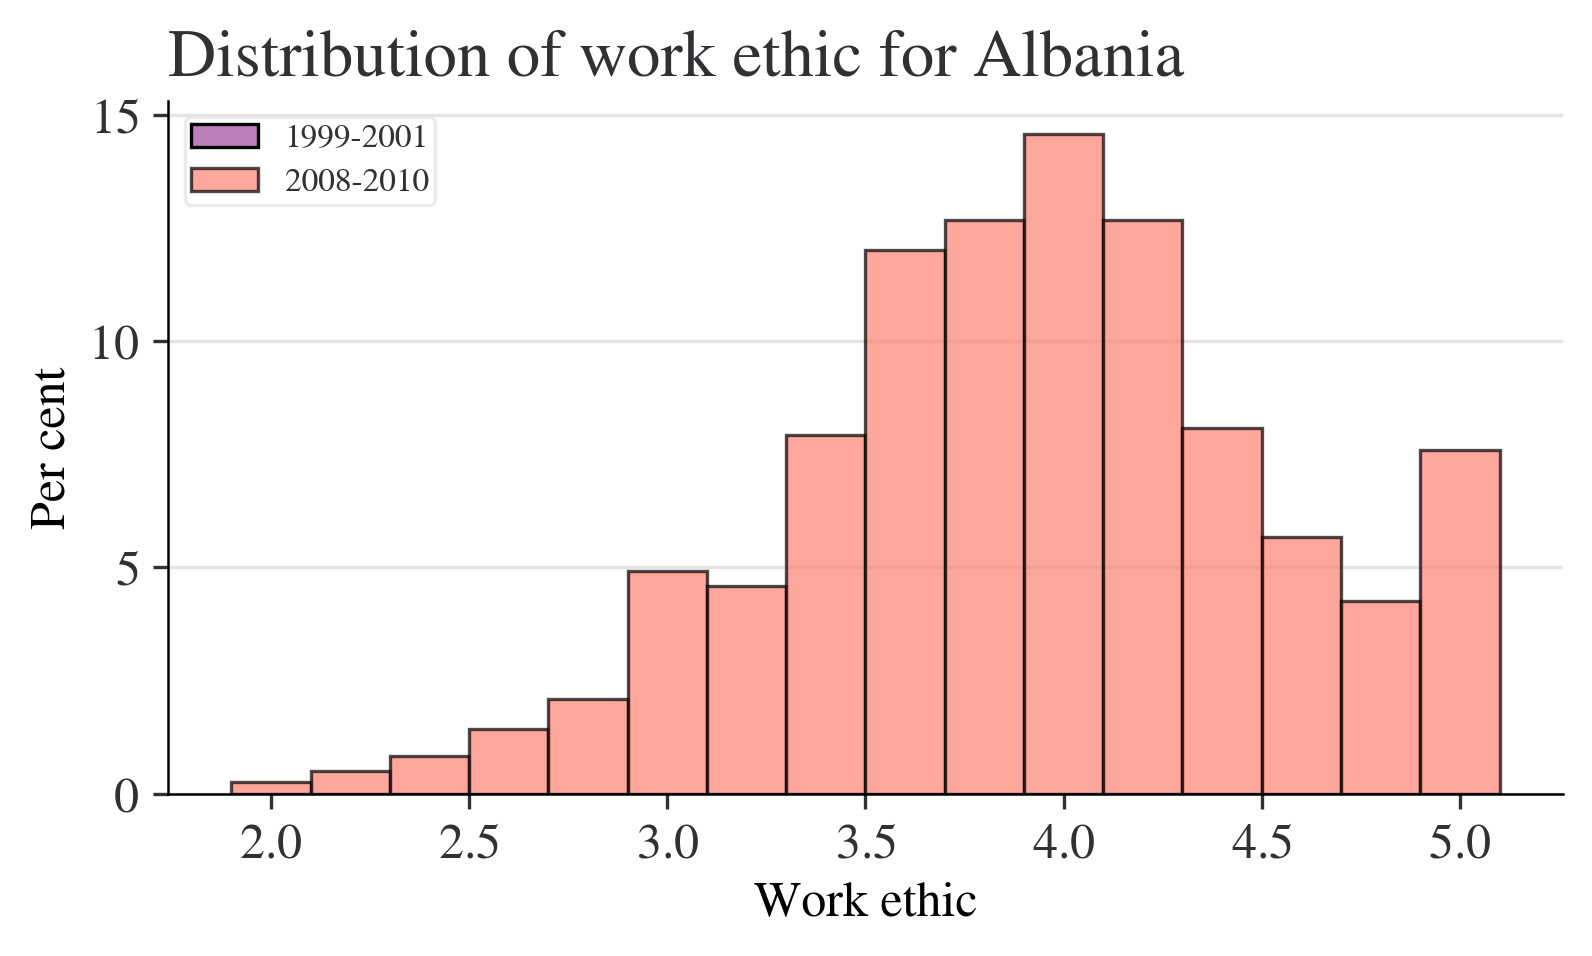

In [57]:
fig, ax = plt.subplots()
for wave in waves:
    sub_df = ethic_pct.loc[
        ethic_pct["S002EVS"] == wave, :
    ]  # For convenience, subset the dataframe
    ax.bar(sub_df["work_ethic"], sub_df["percentage"], width=0.2, alpha=0.7, label=wave)
ax.legend()
ax.set_xlabel("Work ethic")
ax.set_ylabel("Per cent")
ax.set_title(f"Distribution of work ethic for {country}", loc="left")
plt.show()

In [58]:
waves = ["1999-2001", "2008-2010"]
country = "Croatia"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

,S002EVS,work_ethic,count,percentage
0,1999-2001,1.4,1,0.117786
1,1999-2001,1.6,1,0.117786
2,1999-2001,1.8,5,0.588928
3,1999-2001,2.0,10,1.177856
4,1999-2001,2.2,18,2.120141


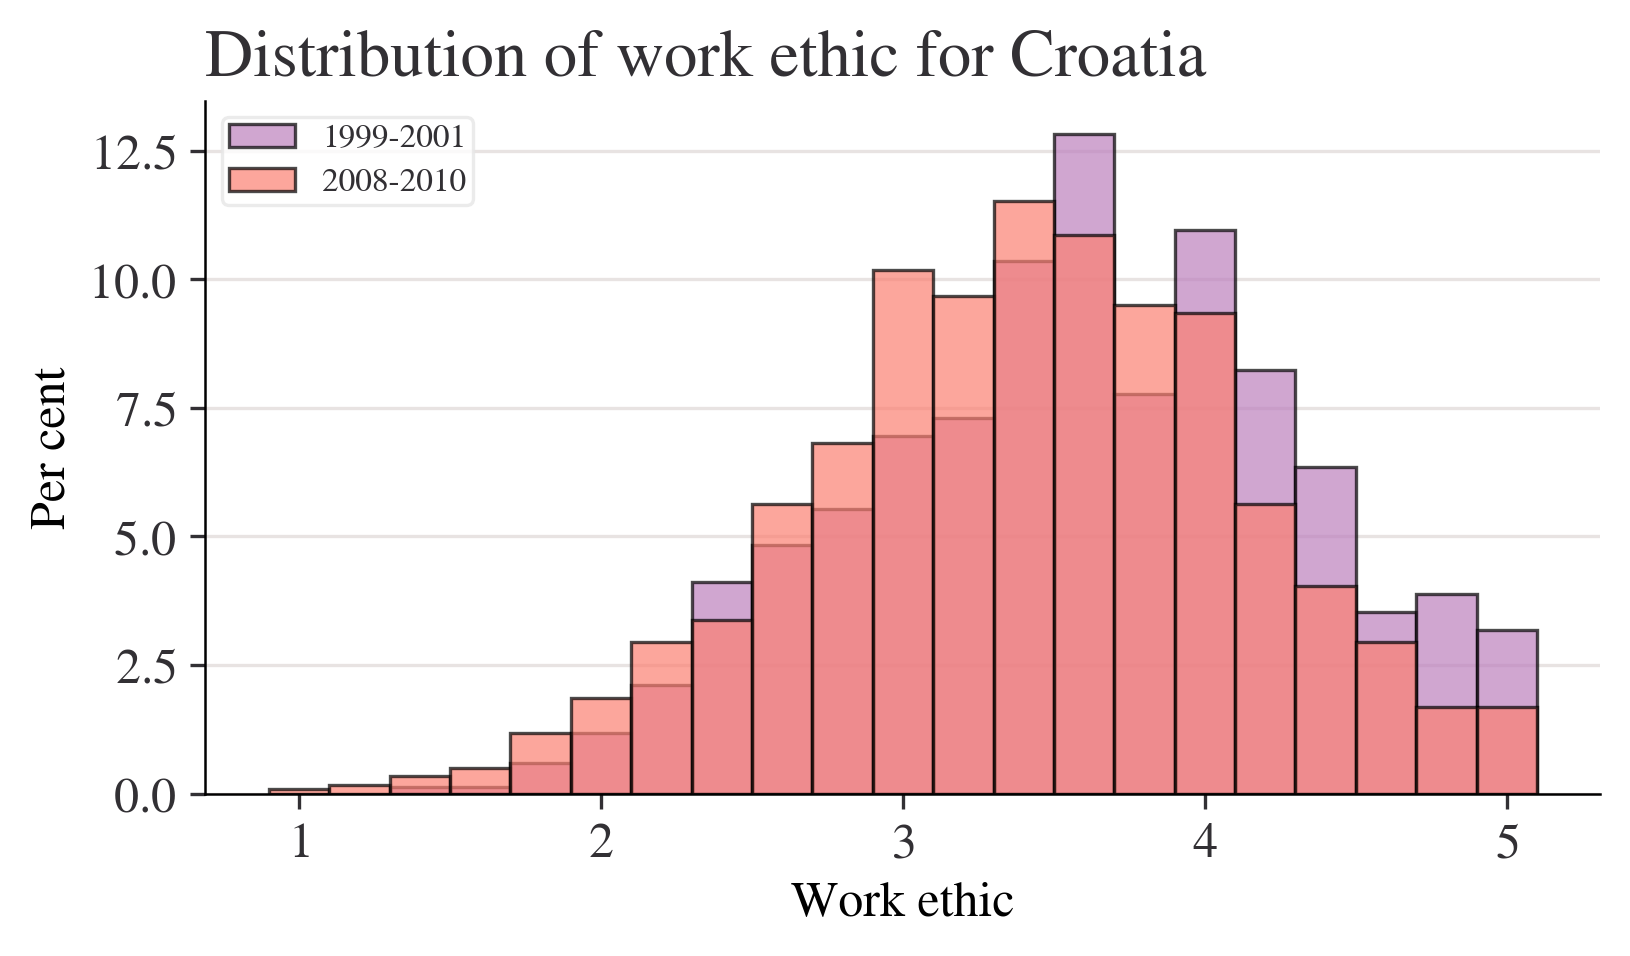

In [59]:
fig, ax = plt.subplots()
for wave in waves:
    sub_df = ethic_pct.loc[
        ethic_pct["S002EVS"] == wave, :
    ]  # For convenience, subset the dataframe
    ax.bar(sub_df["work_ethic"], sub_df["percentage"], width=0.2, alpha=0.7, label=wave)
ax.legend()
ax.set_xlabel("Work ethic")
ax.set_ylabel("Per cent")
ax.set_title(f"Distribution of work ethic for {country}", loc="left")
plt.show()

In [60]:
waves = ["1999-2001", "2008-2010"]
country = "Belgium"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

,S002EVS,work_ethic,count,percentage
0,1999-2001,1.0,18,1.28388
1,1999-2001,1.2,6,0.42796
2,1999-2001,1.4,11,0.784593
3,1999-2001,1.6,19,1.355207
4,1999-2001,1.8,39,2.78174


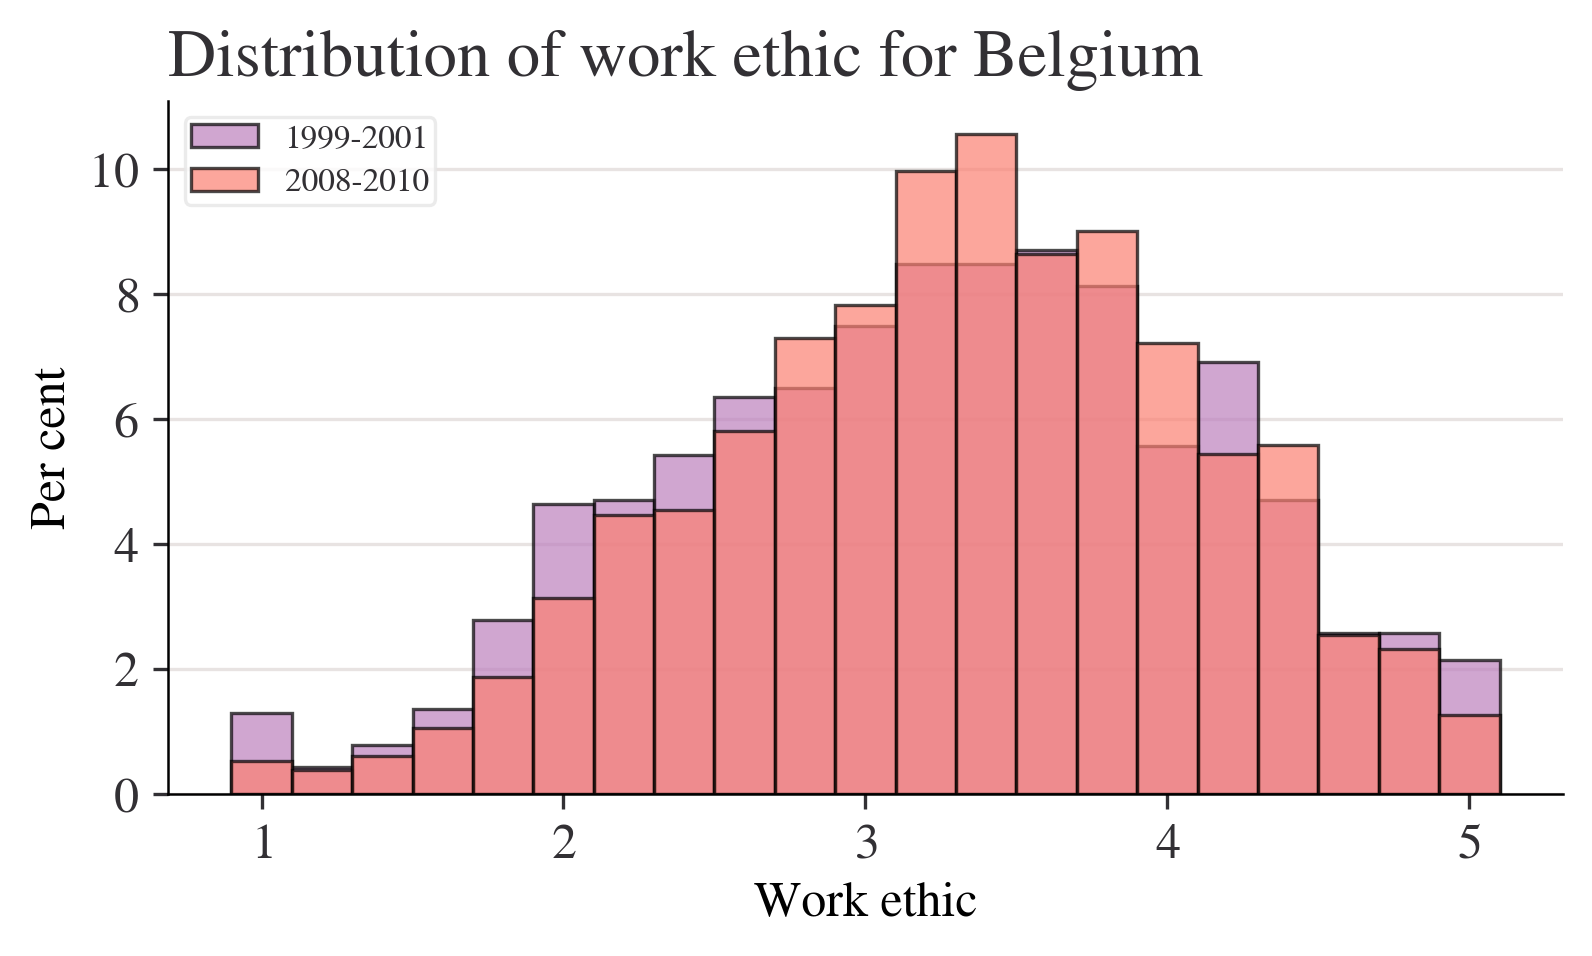

In [61]:
fig, ax = plt.subplots()
for wave in waves:
    sub_df = ethic_pct.loc[
        ethic_pct["S002EVS"] == wave, :
    ]  # For convenience, subset the dataframe
    ax.bar(sub_df["work_ethic"], sub_df["percentage"], width=0.2, alpha=0.7, label=wave)
ax.legend()
ax.set_xlabel("Work ethic")
ax.set_ylabel("Per cent")
ax.set_title(f"Distribution of work ethic for {country}", loc="left")
plt.show()

In [62]:
waves = ["1999-2001"]
country = "Albania"
condition = (lifesat_data["S002EVS"].isin(wave)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `str`

In [ ]:
waves = ["1999-2001"]
country = "Albania"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Changed 'wave' to 'waves' - using the list variable
    lifesat_data["S003"] == country
)  # Only select Albania for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

In [ ]:
waves = ["1999-2001"]
country = "Albania"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

In [ ]:
waves = ["1999-2001"]
country = "Belgium"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

In [ ]:
waves = ["1999-2001"]
country = "Albania"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

In [ ]:
waves = ["2008-2010"]
country = "Albania"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

In [ ]:
waves = ["1999-2001"]
country = "Belgium"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

In [ ]:
waves = ["2008-2010"]
country = "Belgium"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

In [ ]:
waves = ["1999-2001"]
country = "Croatia"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

In [ ]:
waves = ["2008-2010"]
country = "Croatia"
condition = (lifesat_data["S002EVS"].isin(waves)) & (  # Select Waves 3 and 4
    lifesat_data["S003"] == country
)  # Only select Germany for this example

# Create a new dataframe with counts by wave and work ethic score
ethic_pct = (
    lifesat_data.loc[condition, :]
    .groupby(["S002EVS", "work_ethic"])["work_ethic"]
    .count()
    .reset_index(name="count")
)
# Turn the counts into a within-wave percentage using 'transform'
ethic_pct["percentage"] = (
    100 * ethic_pct["count"] / ethic_pct.groupby(["S002EVS"])["count"].transform("sum")
)
ethic_pct.head()

In [ ]:
sum_table = (
    lifesat_data  # Use all data, no filtering by wave
    .groupby(["X028", "S003", "S002EVS"])[  # Group by employment, country, and wave
        "X028"
    ]  
    .count()  
    .unstack(["S003", "S002EVS"])  # Turn countries and waves into columns
    .transform(lambda x: x * 100 / x.sum())  
    .round(2)  
    .T  
)

In [ ]:
sum_table = (
    lifesat_data.loc[
        lifesat_data["S002EVS"] == "2008-2010", :
    ]  # Wave 4 only, all columns
    .groupby(["X028", "S003"])[  # Group by employment and country
        "X028"
    ]  # Select employment column
    .count()  # Count number of observations in each category (employment-country)
    .unstack()  # Turn countries from an index into columns (countries because they are the last groupby variable)
    .transform(lambda x: x * 100 / x.sum())  # Compute a percentage
    .round(2)  # Round to 2 decimal places
    .T  # Transpose so countries are the index, employment types the columns
)

sum_table

In [ ]:
import pandas as pd

# Define the path to your Excel file
path = "doing-economics-datafile-working-in-excel-project-8.xlsx"  # Replace with the correct path to your Excel file

# Load Wave 4
df = pd.read_excel(path, sheet_name="Wave 4")

# Keep only the columns we need (S003 is country in Wave 4)
df = df[["S003", "A170", "X028", "X047D"]].copy()

# Convert life satisfaction to numeric:
# This will turn "Satisfied", "Dissatisfied", ".a", etc. into NaN automatically
df["A170_num"] = pd.to_numeric(df["A170"], errors="coerce")

# Drop rows where life satisfaction is not numeric
df_clean = df.dropna(subset=["A170_num"])

# Group by country and compute average life satisfaction + sample size
country_lifesat = (
    df_clean.groupby("S003")["A170_num"]
    .agg(mean_life_satisfaction="mean", n_obs="count")
    .sort_values("mean_life_satisfaction", ascending=False)
)

print(country_lifesat)

In [ ]:
import pandas as pd

# Load Wave 4
path = "doing-economics-datafile-working-in-excel-project-8.xlsx"
df = pd.read_excel(path, sheet_name="Wave 4")

# Keep only country and employment status
df = df[["S003", "X028"]].copy()

# Map employment status to unemployment score
employment_map = {
    "Unemployed": 1,
    "Part time": 0.5,
    "Full time": 0
}

df["unemployment_score"] = df["X028"].map(employment_map)

# Drop all other employment statuses
df_clean = df.dropna(subset=["unemployment_score"])

# Group by country and compute average unemployment score
country_unemployment = (
    df_clean.groupby("S003")["unemployment_score"]
    .agg(mean_unemployment_score="mean", n_obs="count")
    .sort_values("mean_unemployment_score", ascending=False)
)

print(country_unemployment)


In [ ]:
import pandas as pd

# Load Wave 4
path = "doing-economics-datafile-working-in-excel-project-8.xlsx"
df = pd.read_excel(path, sheet_name="Wave 4")

# Keep only country and household income
df = df[["S003", "X047D"]].copy()

# Convert income to numeric; ".a" and other non-numeric values become NaN
df["income_num"] = pd.to_numeric(df["X047D"], errors="coerce")

# Drop missing / invalid income responses
df_clean = df.dropna(subset=["income_num"])

# Group by country and compute average income
country_income = (
    df_clean.groupby("S003")["income_num"]
    .agg(mean_monthly_income="mean", n_obs="count")
    .sort_values("mean_monthly_income", ascending=False)
)

print(country_income)


In [68]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load Wave 4
path = "doing-economics-datafile-working-in-excel-project-8.xlsx"
df = pd.read_excel(path, sheet_name="Wave 4")

# ---------- Life Satisfaction ----------
lifesat = df[["S003", "A170"]].copy()
lifesat["life_sat"] = pd.to_numeric(lifesat["A170"], errors="coerce")
lifesat = lifesat.dropna(subset=["life_sat"])

country_lifesat = (
    lifesat.groupby("S003")["life_sat"]
    .mean()
    .reset_index()
)

# ---------- Unemployment Score ----------
employment_map = {
    "Unemployed": 1,
    "Part time": 0.5,
    "Full time": 0
}

unemp = df[["S003", "X028"]].copy()
unemp["unemployment_score"] = unemp["X028"].map(employment_map)
unemp = unemp.dropna(subset=["unemployment_score"])

country_unemployment = (
    unemp.groupby("S003")["unemployment_score"]
    .mean()
    .reset_index()
)

# ---------- Household Income ----------
income = df[["S003", "X047D"]].copy()
income["income"] = pd.to_numeric(income["X047D"], errors="coerce")
income = income.dropna(subset=["income"])

country_income = (
    income.groupby("S003")["income"]
    .mean()
    .reset_index()
)

# ---------- Merge all ----------
country_data = (
    country_lifesat
    .merge(country_unemployment, on="S003")
    .merge(country_income, on="S003")
)

print(country_data.head())


      S003  life_sat  unemployment_score    income
0  Albania  6.104433            0.418936  0.622974
1  Armenia  5.776771            0.439944  0.307724
2  Austria  7.041379            0.139610  1.661623
3  Belarus  6.144803            0.105894  0.770016
4  Belgium  7.383739            0.193034  1.952676


In [ ]:
print("rows:", len(country_data))
print("countries:", country_data["S003"].nunique())


In [ ]:
# Define variables
Y = country_data["life_sat"]
X = country_data[["unemployment_score", "income"]]

# Add constant
X = sm.add_constant(X)

# Run OLS
model = sm.OLS(Y, X).fit()

# Print regression results
print(model.summary())

In [67]:
import statsmodels.api as sm

# Dependent variable
Y = country_data["life_sat"]

# Independent variable (unemployment only)
X = country_data[["unemployment_score"]]

# Add constant
X = sm.add_constant(X)

# Run OLS
model_no_income = sm.OLS(Y, X).fit()

# Print results
print(model_no_income.summary())


NameError: name 'country_data' is not defined

In [66]:
# Create LowIncome dummy (below median income)
median_income = country_data["income"].median()
country_data["low_income"] = (country_data["income"] < median_income).astype(int)


NameError: name 'country_data' is not defined

In [65]:
country_data["unemp_x_lowinc"] = (
    country_data["unemployment_score"] * country_data["low_income"]
)


NameError: name 'country_data' is not defined

In [ ]:
import statsmodels.api as sm

Y = country_data["life_sat"]
X = country_data[[
    "unemployment_score",
    "low_income",
    "unemp_x_lowinc"
]]

X = sm.add_constant(X)

model_interaction = sm.OLS(Y, X).fit()
print(model_interaction.summary())


In [ ]:
import pandas as pd

scenarios = pd.DataFrame({
    "const": 1,
    "unemployment_score": [0.1, 0.1, 0.3, 0.3],
    "low_income": [0, 1, 0, 1]
})

scenarios["unemp_x_lowinc"] = (
    scenarios["unemployment_score"] * scenarios["low_income"]
)

scenarios["pred_life_sat"] = model_interaction.predict(scenarios)
print(scenarios)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Variables
Y = country_data["life_sat"]
X = country_data["unemployment_score"]

# Add constant and fit model
X_const = sm.add_constant(X)
model_simple = sm.OLS(Y, X_const).fit()

# Scatter plot
plt.figure()
plt.scatter(X, Y)

# Regression line
x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = model_simple.params[0] + model_simple.params[1] * x_vals
plt.plot(x_vals, y_vals)

plt.xlabel("Average unemployment score")
plt.ylabel("Average life satisfaction")
plt.title("Life Satisfaction vs Unemployment (country level)")
plt.show()


In [ ]:
median_income = country_data["income"].median()

low_income = country_data[country_data["income"] < median_income]
high_income = country_data[country_data["income"] >= median_income]
# Low-income regression
X_low = sm.add_constant(low_income["unemployment_score"])
model_low = sm.OLS(low_income["life_sat"], X_low).fit()

# High-income regression
X_high = sm.add_constant(high_income["unemployment_score"])
model_high = sm.OLS(high_income["life_sat"], X_high).fit()
plt.figure()

# Scatter points
plt.scatter(
    low_income["unemployment_score"],
    low_income["life_sat"],
    label="Low-income countries"
)

plt.scatter(
    high_income["unemployment_score"],
    high_income["life_sat"],
    label="High-income countries"
)

# X range
x_vals = np.linspace(
    country_data["unemployment_score"].min(),
    country_data["unemployment_score"].max(),
    100
)

# Regression lines
plt.plot(
    x_vals,
    model_low.params[0] + model_low.params[1] * x_vals,
    linestyle="--",
    label="Low-income fit"
)

plt.plot(
    x_vals,
    model_high.params[0] + model_high.params[1] * x_vals,
    linestyle="--",
    label="High-income fit"
)

plt.xlabel("Average unemployment score")
plt.ylabel("Average life satisfaction")
plt.title("Unemployment and Life Satisfaction by Income Group")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Median cutoffs
median_income = country_data["income"].median()
median_unemp = country_data["unemployment_score"].median()

# Group indicators
country_data["income_group"] = country_data["income"].apply(
    lambda x: "Low income" if x < median_income else "High income"
)

country_data["unemp_group"] = country_data["unemployment_score"].apply(
    lambda x: "Low unemployment" if x < median_unemp else "High unemployment"
)

# Combined 4-category group
country_data["group"] = country_data["income_group"] + " & " + country_data["unemp_group"]

# Quick check
print("Median income:", median_income)
print("Median unemployment score:", median_unemp)
print(country_data[["S003", "life_sat", "income", "unemployment_score", "group"]].head())


In [ ]:
group_table = (
    country_data.groupby(["income_group", "unemp_group"])["life_sat"]
    .agg(mean_life_satisfaction="mean", n_countries="count")
    .reset_index()
)

print(group_table)


In [ ]:
# Put groups in a sensible order for the plot
group_order = [
    "High income & Low unemployment",
    "High income & High unemployment",
    "Low income & Low unemployment",
    "Low income & High unemployment"
]

plot_data = (
    country_data.groupby("group")["life_sat"]
    .mean()
    .reindex(group_order)
)

plt.figure()
plt.bar(plot_data.index, plot_data.values)
plt.xticks(rotation=25, ha="right")
plt.ylabel("Average life satisfaction")
plt.title("Average Life Satisfaction by Income and Unemployment Group")
plt.tight_layout()
plt.show()


In [ ]:
# Keep only these two groups
keep_groups = ["High income & High unemployment", "Low income & High unemployment"]
df2 = country_data[country_data["group"].isin(keep_groups)].copy()

print(df2["group"].value_counts())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Summary stats by group
summary = (
    df2.groupby("group")["life_sat"]
      .agg(mean="mean", sd="std", n="count")
      .reset_index()
)

summary["ci95"] = 1.96 * summary["se"]

# Order bars nicely: High income first, then Low income
order = ["High income & High unemployment", "Low income & High unemployment"]
summary["group"] = pd.Categorical(summary["group"], categories=order, ordered=True)
summary = summary.sort_values("group")

print(summary)


In [ ]:
plt.figure(figsize=(8, 5))

plt.bar(
    summary["group"],
    summary["mean"],
    yerr=summary["ci95"],
    capsize=8
)

plt.ylabel("Average life satisfaction")
plt.title("Life Satisfaction under High Unemployment: High vs Low Income Countries")

# Make x labels easier to read
plt.xticks(rotation=10, ha="right")

# Add value + n labels on top of bars
for i, row in summary.iterrows():
    plt.text(
        i,
        row["mean"] + row["ci95"] + 0.03,
        f"mean={row['mean']:.2f}\n(n={int(row['n'])})",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [ ]:
# Keep only the two groups of interest
groups_of_interest = [
    "High income & High unemployment",
    "Low income & High unemployment"
]

country_table = (
    country_data[country_data["group"].isin(groups_of_interest)]
    .loc[:, ["S003", "income", "unemployment_score", "life_sat", "group"]]
    .sort_values(["group", "life_sat"], ascending=[True, False])
)

# Rename columns to be presentation-friendly
country_table = country_table.rename(columns={
    "S003": "Country",
    "income": "Avg monthly income (000€ PPP)",
    "unemployment_score": "Avg unemployment score",
    "life_sat": "Avg life satisfaction",
    "group": "Group"
})

print(country_table)


In [ ]:
import pandas as pd

# Given medians (as specified by you)
median_income = 1.33
median_unemployment = 0.17

# Assume this is your existing filtered table
df = country_table.copy()

# Income category
df["Income category"] = df["Avg monthly income (000€ PPP)"].apply(
    lambda x: "Category A (Above median income)" if x > median_income
    else "Category B (Below median income)"
)

# Unemployment indicator (all are above median by construction)
df["Unemployment category"] = "Above median unemployment"

# Select and order columns neatly
final_table = df[[
    "Country",
    "Avg monthly income (000€ PPP)",
    "Income category",
    "Avg unemployment score",
    "Unemployment category",
    "Avg life satisfaction"
]]

# Sort by income category then income level (optional, but neat)
final_table = final_table.sort_values(
    ["Income category", "Avg monthly income (000€ PPP)"],
    ascending=[True, False]
)

print(final_table)


In [ ]:
import pandas as pd

# Select variables to summarise
vars_to_summarise = country_data[[
    "income",
    "unemployment_score",
    "life_sat"
]]

# Create summary statistics table
summary_stats = vars_to_summarise.agg(
    ["mean", "median", "std"]
).transpose()

# Rename rows and columns for presentation
summary_stats = summary_stats.rename(
    index={
        "income": "Avg monthly income (000€ PPP)",
        "unemployment_score": "Avg unemployment score",
        "life_sat": "Avg life satisfaction"
    },
    columns={
        "mean": "Mean",
        "median": "Median",
        "std": "Standard deviation"
    }
)

print(summary_stats)


In [ ]:
import matplotlib.pyplot as plt

# --- Choose any illustrative values you like ---
W0 = 1.0   # initial real wage level (before)
W1 = 0.8   # lower real wage level (after: lower productivity)

# Employment axis range
N_min, N_max = 0, 1.0

plt.figure(figsize=(10, 5))

# Two PS real wage curves (horizontal lines)
plt.hlines(W0, N_min, N_max, linestyles='-', linewidth=2, label='PS (before): W0')
plt.hlines(W1, N_min, N_max, linestyles='--', linewidth=2, label='PS (after): W1 (lower productivity)')

# Arrow showing downward shift
x_arrow = 0.85 * (N_max - N_min) + N_min
plt.annotate(
    '', xy=(x_arrow, W1), xytext=(x_arrow, W0),
    arrowprops=dict(arrowstyle='->', linewidth=2)
)
plt.text(x_arrow + 0.02, (W0 + W1) / 2, 'Downward shift', va='center')

# Labels and formatting
plt.xlim(N_min, N_max)
plt.ylim(0, max(W0, W1) * 1.25)

plt.xlabel('Employment, N')
plt.ylabel('Real wage, W')
plt.title('Price-setting real wage curve: downward shift (e.g., lower productivity)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Employment range
N_min, N_max = 0, 1

# Levels (purely illustrative)
lambda_high = 1.0
lambda_low = 0.8

W_high = 0.6
W_low = 0.45

plt.figure(figsize=(10, 5))

# Lambda lines (productivity)
plt.hlines(lambda_high, N_min, N_max, colors='orange', linestyles='-', linewidth=2)
plt.hlines(lambda_low, N_min, N_max, colors='orange', linestyles=':', linewidth=2)

# Wage-setting lines
plt.hlines(W_high, N_min, N_max, colors='blue', linestyles='-', linewidth=2)
plt.hlines(W_low, N_min, N_max, colors='blue', linestyles=':', linewidth=2)

# Text labels (right side)
x_text = 0.92

plt.text(x_text, lambda_high, r'$\lambda$', color='orange', va='center')
plt.text(x_text, lambda_low, r"$\lambda'$", color='orange', va='center')

plt.text(x_text, W_high, r'$W$', color='blue', va='center')
plt.text(x_text, W_low, r"$W'$", color='blue', va='center')

# Axes (no units)
plt.xlabel('Employment, N')
plt.ylabel('')

plt.xlim(N_min, N_max)
plt.ylim(0, 1.15)

# Clean look
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.title('Price-setting and productivity curves')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Employment range
N_min, N_max = 0, 1

# Levels (illustrative)
lambda_high = 1.0
lambda_low = 0.8

W_high = 0.6
W_low = 0.45

plt.figure(figsize=(10, 5))

# Lambda (productivity) lines
plt.hlines(lambda_high, N_min, N_max, colors='orange', linestyles='-', linewidth=2)
plt.hlines(lambda_low, N_min, N_max, colors='orange', linestyles=':', linewidth=2)

# Wage-setting (PS) lines
plt.hlines(W_high, N_min, N_max, colors='blue', linestyles='-', linewidth=2)
plt.hlines(W_low, N_min, N_max, colors='blue', linestyles=':', linewidth=2)

# Labels on the right
x_text = 0.92
plt.text(x_text, lambda_high, r'$\lambda$', color='orange', va='center')
plt.text(x_text, lambda_low, r"$\lambda'$", color='orange', va='center')
plt.text(x_text, W_high, r'$W$', color='blue', va='center')
plt.text(x_text, W_low, r"$W'$", color='blue', va='center')

# Axis labels (as requested)
plt.xlabel('Employment')
plt.ylabel('Real wage')

# Clean look
plt.xlim(N_min, N_max)
plt.ylim(0, 1.15)
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.title('Price-setting and productivity curves')

plt.show()


In [69]:
# Median cutoffs (already defined earlier, but restating for clarity)
median_income = country_data["income"].median()
median_unemp = country_data["unemployment_score"].median()

# High-income countries only
high_income_df = country_data[country_data["income"] >= median_income].copy()


In [70]:
high_income_df["unemp_group"] = high_income_df["unemployment_score"].apply(
    lambda x: "Low unemployment" if x < median_unemp else "High unemployment"
)


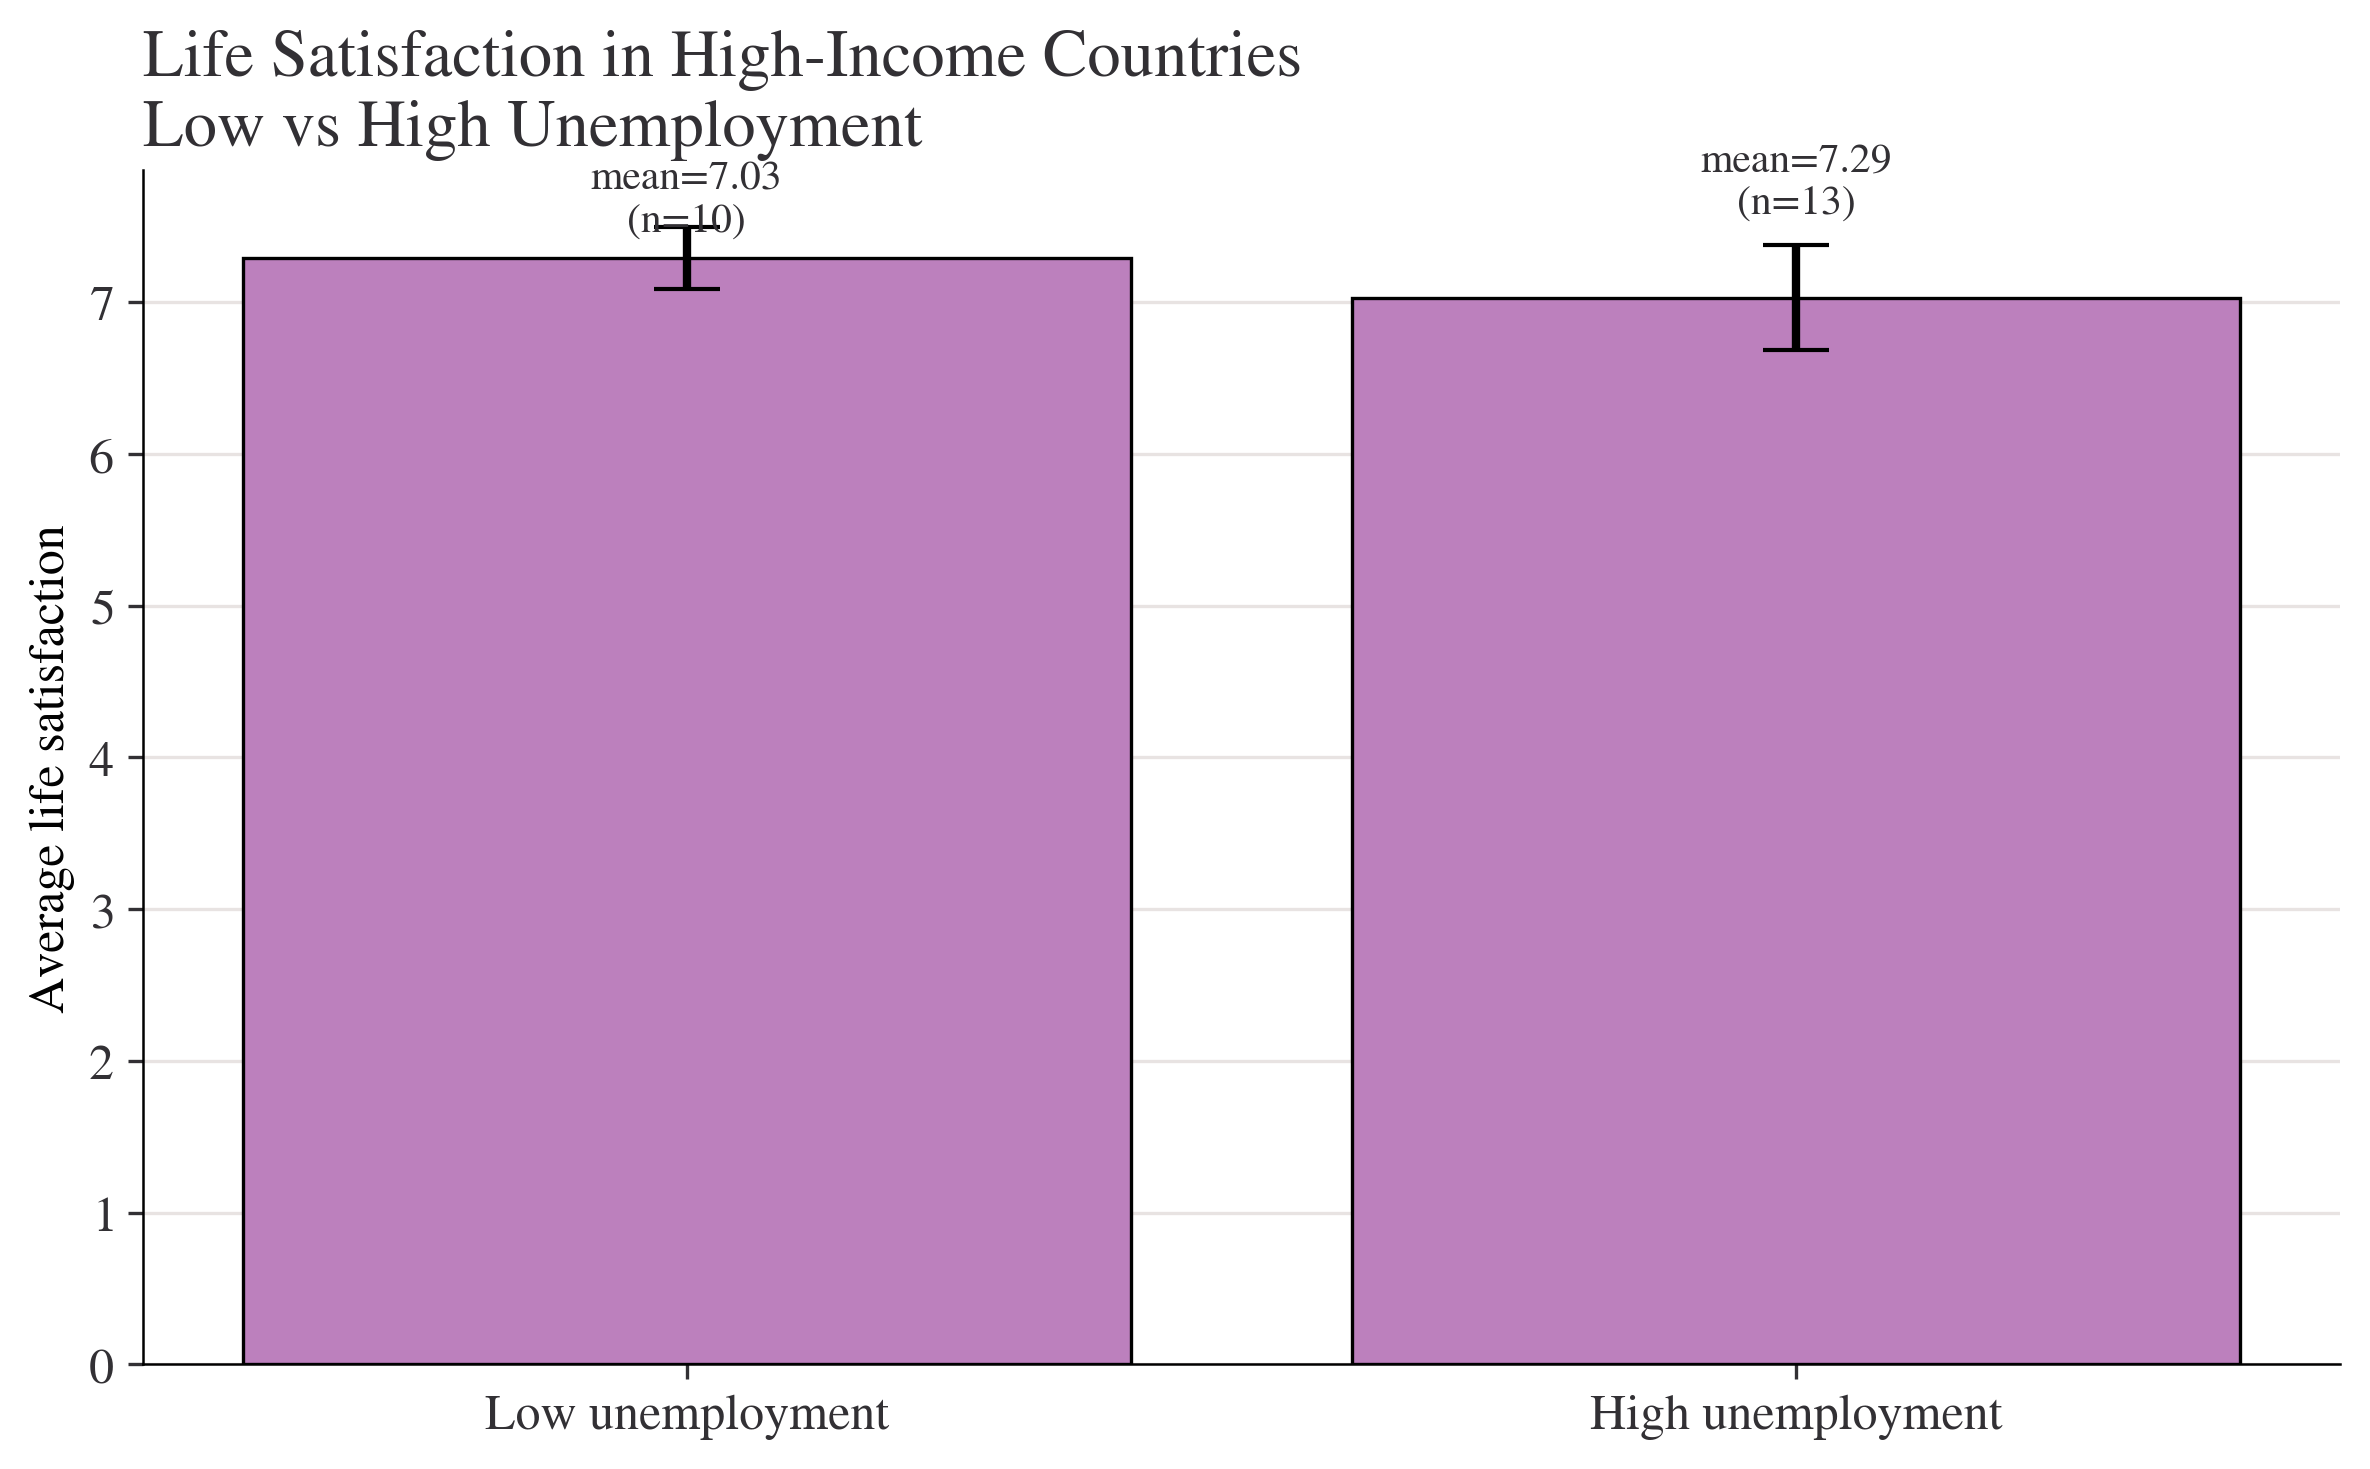

In [73]:
import matplotlib.pyplot as plt

# Order bars nicely
order = ["Low unemployment", "High unemployment"]
summary_hi["unemp_group"] = pd.Categorical(
    summary_hi["unemp_group"], categories=order, ordered=True
)
summary_hi = summary_hi.sort_values("unemp_group")

plt.figure(figsize=(8, 5))

plt.bar(
    summary_hi["unemp_group"],
    summary_hi["mean"],
    yerr=summary_hi["ci95"],
    capsize=8
)

plt.ylabel("Average life satisfaction")
plt.title("Life Satisfaction in High-Income Countries\nLow vs High Unemployment")

# Add labels on top
for i, row in summary_hi.iterrows():
    plt.text(
        i,
        row["mean"] + row["ci95"] + 0.03,
        f"mean={row['mean']:.2f}\n(n={int(row['n'])})",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


In [72]:
summary_hi = (
    high_income_df.groupby("unemp_group")["life_sat"]
    .agg(mean="mean", sd="std", n="count")
    .reset_index()
)

summary_hi["se"] = summary_hi["sd"] / (summary_hi["n"] ** 0.5)
summary_hi["ci95"] = 1.96 * summary_hi["se"]

print(summary_hi)

         unemp_group      mean        sd   n        se      ci95
0  High unemployment  7.030584  0.558494  10  0.176611  0.346158
1   Low unemployment  7.289387  0.378386  13  0.104945  0.205693


In [74]:
# Median cutoffs (use existing ones if already defined)
median_income = country_data["income"].median()
median_unemp = country_data["unemployment_score"].median()

# Keep ONLY low-unemployment countries
low_unemp_df = country_data[country_data["unemployment_score"] < median_unemp].copy()

# Define income groups
low_unemp_df["income_group"] = low_unemp_df["income"].apply(
    lambda x: "High income" if x >= median_income else "Low income"
)


In [75]:
summary_low_unemp = (
    low_unemp_df.groupby("income_group")["life_sat"]
    .agg(mean="mean", sd="std", n="count")
    .reset_index()
)

summary_low_unemp["se"] = summary_low_unemp["sd"] / (summary_low_unemp["n"] ** 0.5)
summary_low_unemp["ci95"] = 1.96 * summary_low_unemp["se"]

print(summary_low_unemp)


  income_group      mean        sd   n        se      ci95
0  High income  7.289387  0.378386  13  0.104945  0.205693
1   Low income  6.504367  0.286084  10  0.090468  0.177317


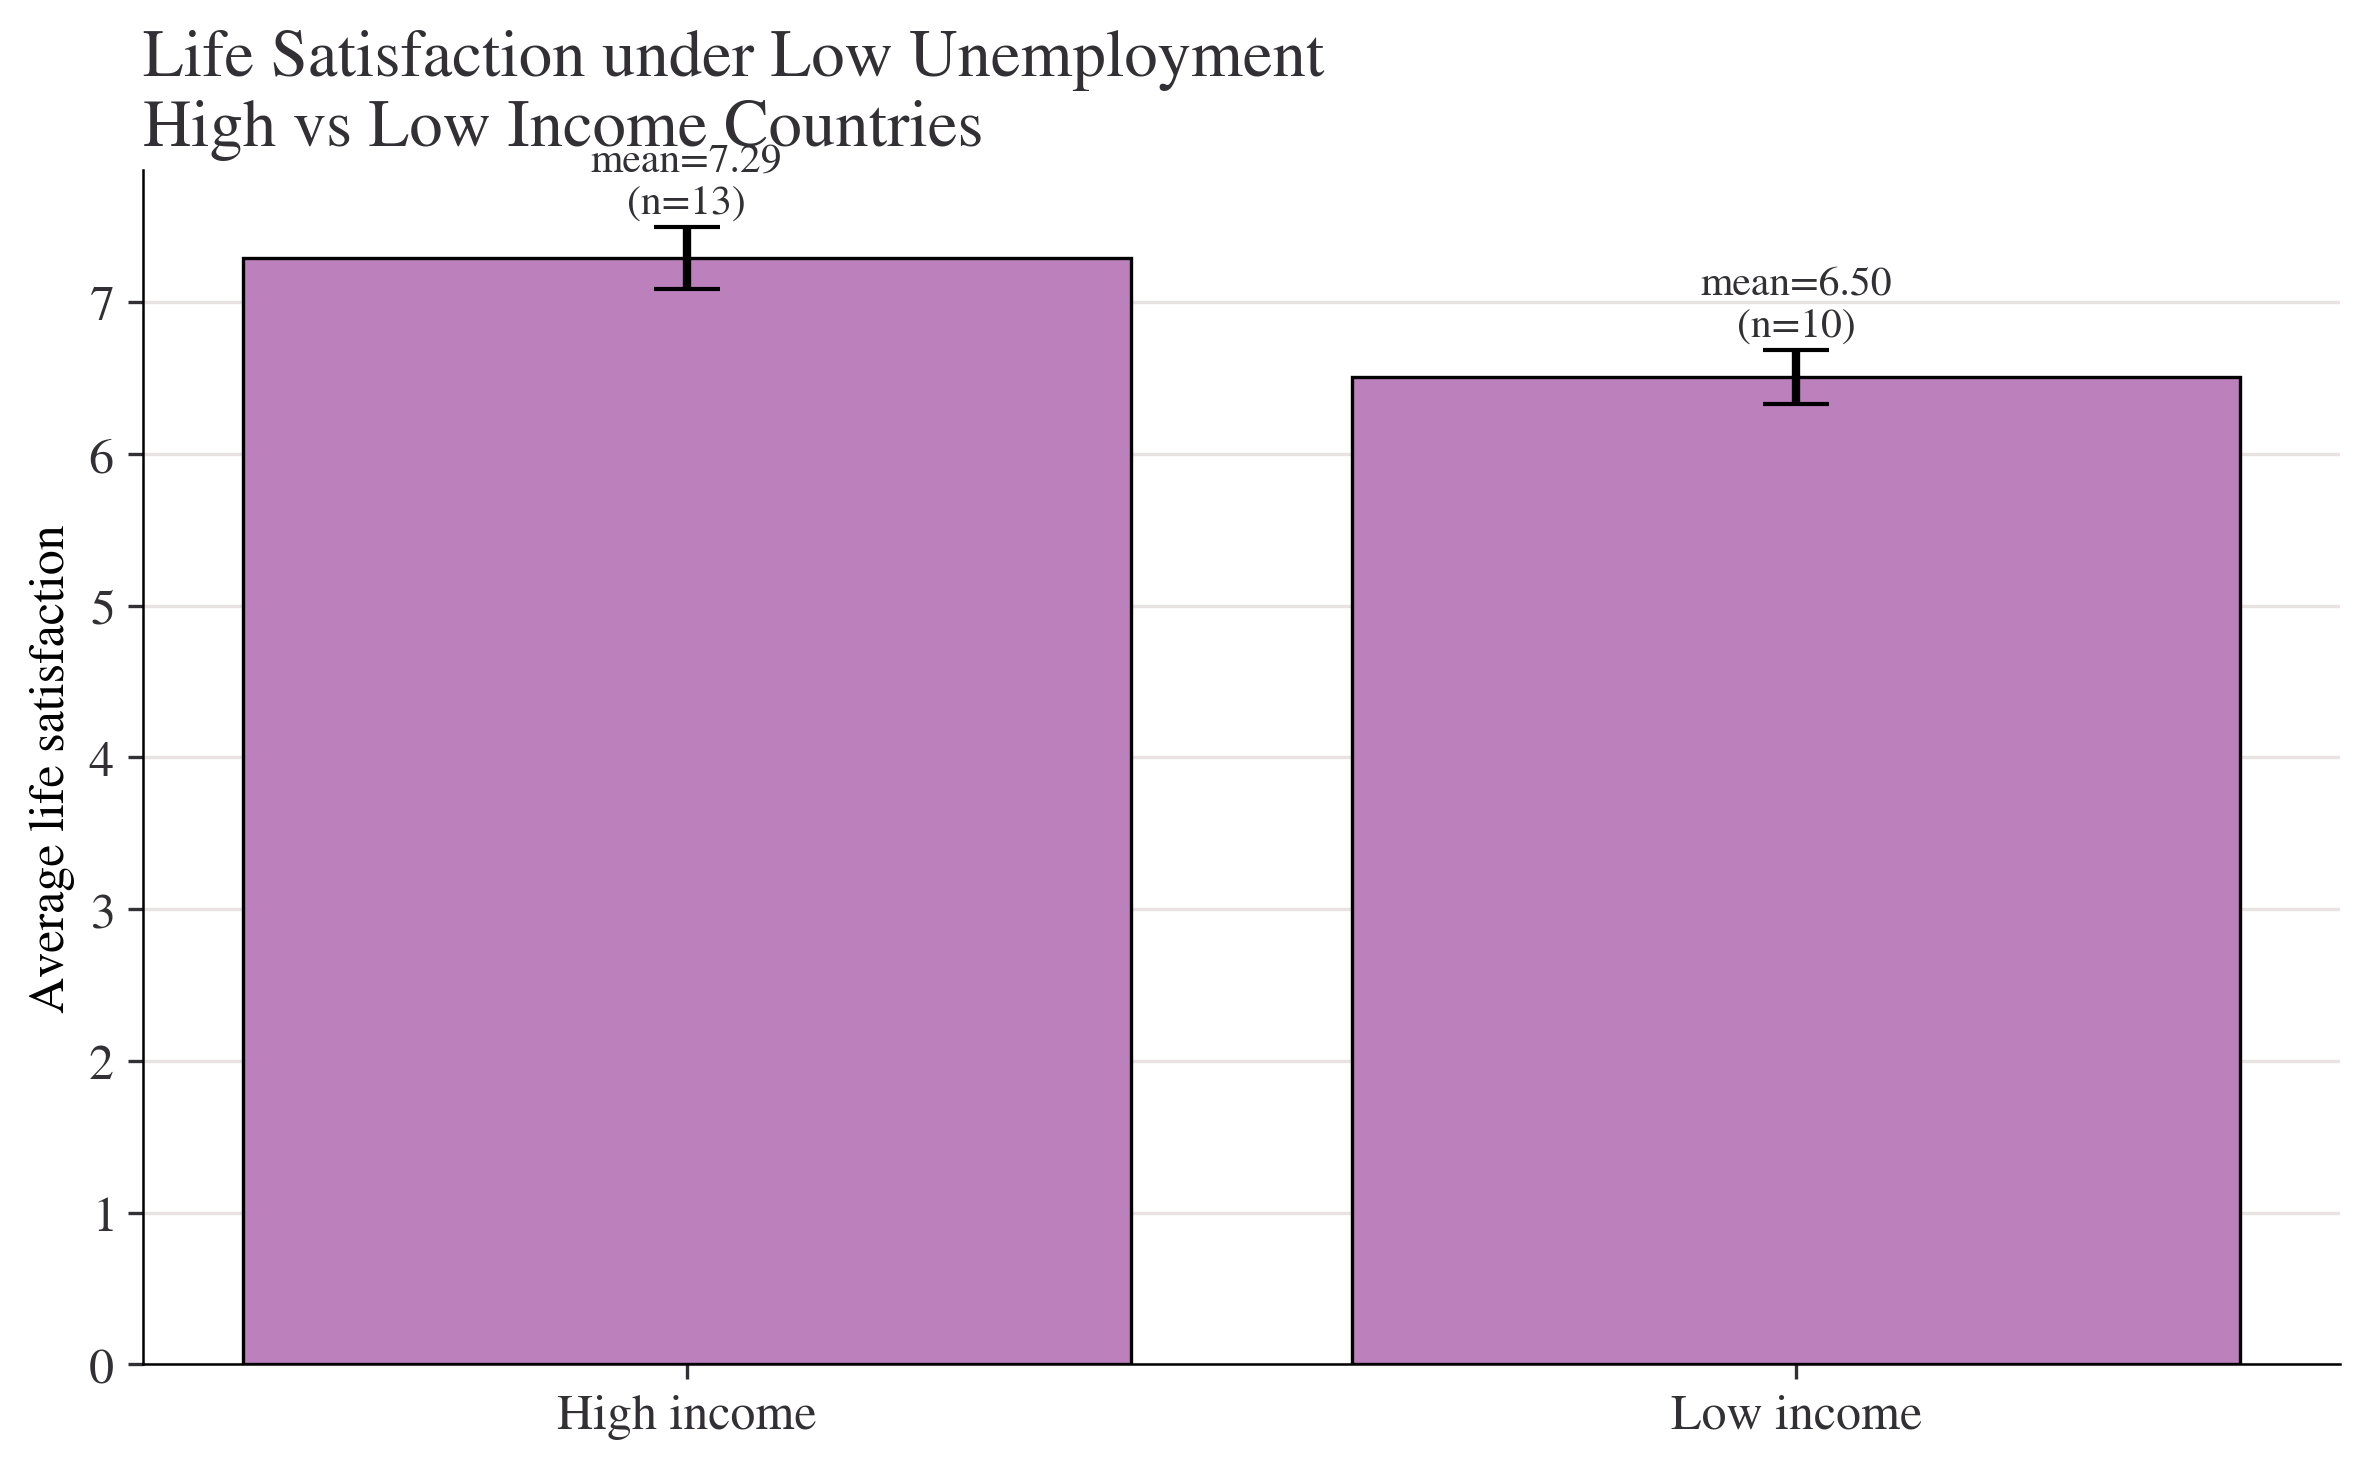

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Order bars nicely
order = ["High income", "Low income"]
summary_low_unemp["income_group"] = pd.Categorical(
    summary_low_unemp["income_group"], categories=order, ordered=True
)
summary_low_unemp = summary_low_unemp.sort_values("income_group")

plt.figure(figsize=(8, 5))

plt.bar(
    summary_low_unemp["income_group"],
    summary_low_unemp["mean"],
    yerr=summary_low_unemp["ci95"],
    capsize=8
)

plt.ylabel("Average life satisfaction")
plt.title("Life Satisfaction under Low Unemployment\nHigh vs Low Income Countries")

# Add mean and n labels
for i, row in summary_low_unemp.iterrows():
    plt.text(
        i,
        row["mean"] + row["ci95"] + 0.03,
        f"mean={row['mean']:.2f}\n(n={int(row['n'])})",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


In [77]:
low_unemp_df = country_data[country_data["unemployment_score"] < median_unemp].copy()


In [78]:
table_high_income_low_unemp = (
    low_unemp_df[low_unemp_df["income"] >= median_income]
    .loc[:, ["S003", "income"]]
    .rename(columns={
        "S003": "Country",
        "income": "Avg monthly income (000€ PPP)"
    })
    .sort_values("Avg monthly income (000€ PPP)", ascending=False)
)

print("High income & Low unemployment")
print(table_high_income_low_unemp)


High income & Low unemployment
        Country  Avg monthly income (000€ PPP)
25   Luxembourg                       3.020558
12      Finland                       2.636069
43  Switzerland                       2.614854
33       Norway                       2.414285
42       Sweden                       2.140075
19      Iceland                       2.104028
10      Denmark                       2.060014
13       France                       1.783267
40     Slovenia                       1.734910
8        Cyprus                       1.665742
2       Austria                       1.661623
27        Malta                       1.517967
17       Greece                       1.361928


In [79]:
table_low_income_low_unemp = (
    low_unemp_df[low_unemp_df["income"] < median_income]
    .loc[:, ["S003", "income"]]
    .rename(columns={
        "S003": "Country",
        "income": "Avg monthly income (000€ PPP)"
    })
    .sort_values("Avg monthly income (000€ PPP)", ascending=False)
)

print("\nLow income & Low unemployment")
print(table_low_income_low_unemp)



Low income & Low unemployment
               Country  Avg monthly income (000€ PPP)
34              Poland                       1.305437
9       Czech Republic                       1.196731
11             Estonia                       0.891790
39            Slovakia                       0.854641
24           Lithuania                       0.816100
23              Latvia                       0.805721
3              Belarus                       0.770016
18             Hungary                       0.728272
36             Romania                       0.687615
37  Russian Federation                       0.510655


In [80]:
table_high_income_low_unemp = (
    low_unemp_df[low_unemp_df["income"] >= median_income]
    .loc[:, ["S003", "income", "unemployment_score"]]
    .rename(columns={
        "S003": "Country",
        "income": "Avg monthly income (000€ PPP)",
        "unemployment_score": "Avg unemployment score"
    })
    .sort_values("Avg monthly income (000€ PPP)", ascending=False)
)

print("High income & Low unemployment")
print(table_high_income_low_unemp)


High income & Low unemployment
        Country  Avg monthly income (000€ PPP)  Avg unemployment score
25   Luxembourg                       3.020558                0.116876
12      Finland                       2.636069                0.131503
43  Switzerland                       2.614854                0.140665
33       Norway                       2.414285                0.090774
42       Sweden                       2.140075                0.130886
19      Iceland                       2.104028                0.144567
10      Denmark                       2.060014                0.086549
13       France                       1.783267                0.140288
40     Slovenia                       1.734910                0.096264
8        Cyprus                       1.665742                0.093686
2       Austria                       1.661623                0.139610
27        Malta                       1.517967                0.161319
17       Greece                       1.361928

In [81]:
table_low_income_low_unemp = (
    low_unemp_df[low_unemp_df["income"] < median_income]
    .loc[:, ["S003", "income", "unemployment_score"]]
    .rename(columns={
        "S003": "Country",
        "income": "Avg monthly income (000€ PPP)",
        "unemployment_score": "Avg unemployment score"
    })
    .sort_values("Avg monthly income (000€ PPP)", ascending=False)
)

print("\nLow income & Low unemployment")
print(table_low_income_low_unemp)



Low income & Low unemployment
               Country  Avg monthly income (000€ PPP)  Avg unemployment score
34              Poland                       1.305437                0.170226
9       Czech Republic                       1.196731                0.087948
11             Estonia                       0.891790                0.094857
39            Slovakia                       0.854641                0.139001
24           Lithuania                       0.816100                0.126026
23              Latvia                       0.805721                0.134159
3              Belarus                       0.770016                0.105894
18             Hungary                       0.728272                0.163361
36             Romania                       0.687615                0.100306
37  Russian Federation                       0.510655                0.115302
